In [69]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import seaborn as sns; sns.set(style='white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')
from pandas.api.types import is_numeric_dtype
import random
from sklearn.metrics import precision_score, accuracy_score

In [70]:
# data = pd.read_csv('/home/administrator123/Akanksha/Company_Work/datasetcpulogs/Data/CpuLogData.csv')
data = pd.read_csv('https://raw.githubusercontent.com/prayas2409/logs/master/CpuLogData.csv')
# # from local
# data = pd.read_csv('/home/admin-1/IdeaProjects/logs/CpuLogData.csv')

data['Dates'] = pd.to_datetime(data['DateTime']).dt.date
data['Time'] = pd.to_datetime(data['DateTime']).dt.time
data.shape

(33524, 43)

In [71]:
u_name = ['mohitkr1301@gmail.com', 'sapnapatil344@gmail.com', 'akankshakaple@gmail.com'
         ,'you@example.com']
for i in u_name:
    data.drop(data[data['user_name'] == i].index, inplace=True)
data.shape

(31698, 43)

In [72]:
data['user_name'].unique()
# data.columns

array(['kadamsagar039@gmail.com', 'akshaykumarmhindanavees@gmail.com',
       'rohankadam662', 'aniketmule218@gmail.com',
       'gaurav23091996@gmail.com', 'honeykrsingh16@gmail.com',
       'sheetalbedarkar96@gmail.com', 'khatalapeksha@gmail.com',
       'nilamkurhade87@gmail.com', 'kuchipudiyuvaraj@gmail.com',
       'nishigandhalondhe91@gmail.com', 'samadhanmahajan73@gmail.com',
       'poojatodkar124@gmail.com', 'singh.saurabh3333@gmail.com',
       'vidyaramesh1428@gmail.com', 'anuj.bhelkar@gmail.com',
       'santhoshgante124@gmail.com', 'damodharn21@gmail.com',
       '5152ibrahim@gmail.com', 'aartigawai22@gmail.com',
       'kiranraikar777@gmail.com', 'nitishtech.info@gmail.com',
       'kaleshwetaanil@gmail.com', 'sharlawar77@gmail.com',
       'kalyani24deobhankar@gmail.com', 'kukadeshilpaa7m95@gmail.com',
       'venkatesh.er2@gmail.com', 'j.shubham44.sj@gmail.com',
       'kumar.arjun6515@gmail.com', 'dehariyakiran332@gmail.com',
       'ashwini.pachare8@gmail.com', 'ravik

In [73]:
feature_eng_col = ['Cpu Working Time', 'Cpu idle Time', 'number of software interrupts since boot'
                   ,'number of interrupts since boot', 'disk_read_count', 'disk_write_count'
                   ,'disk_read_bytes', 'disk_write_bytes', 'time spent reading from disk'
                   ,'time spent writing to disk', 'time spent doing actual I/Os'
                   ,'number of bytes sent', 'number of bytes received'
                   ,'number of packets sent', 'number of packets recived']

# To be checked again

# Remove constant data
constant_col = ['Cpu Count', 'Usage Cpu Count ', 'number of system calls since boot'
                , 'system_total_memory', 'total number of errors while receiving'
                ,'total number of errors while sending','total number of incoming packets which were dropped'
                ,'total number of outgoing packets which were dropped', 'disk_total_memory']

# Remove Inter dependent data
inter_dependet_cols = ['system_free_memory', 'disk_free_memory', 'system_avalible_memory', 'system_used_memory']

# Remove object data 
object_col = ['DateTime', 'Dates', 'Time', 'boot_time']

In [74]:
def remove_col(data,col_list):
    data.drop(columns=col_list, inplace=True)
    return data
data = remove_col(data, inter_dependet_cols)
# data.columns
data = remove_col(data, constant_col)
data.shape

(31698, 30)

In [176]:
final_df['DateTime'].head()

0    2019-08-08 12:45:01
1    2019-08-08 12:50:01
2    2019-08-08 12:55:01
3    2019-08-08 13:00:01
4    2019-08-08 13:05:01
Name: DateTime, dtype: object

In [75]:
data.columns

Index(['DateTime', 'Cpu Working Time', 'Cpu idle Time', 'cpu_percent',
       'number of software interrupts since boot',
       'number of interrupts since boot', 'cpu avg load over 1 min',
       'cpu avg load over 5 min', 'cpu avg load over 15 min',
       'system_active_memory', 'system_inactive_memory',
       'system_buffers_memory', 'system_cached_memory', 'system_shared_memory',
       'disk_used_memory', 'disk_read_count', 'disk_write_count',
       'disk_read_bytes', 'disk_write_bytes', 'time spent reading from disk',
       'time spent writing to disk', 'time spent doing actual I/Os',
       'number of bytes sent', 'number of bytes received',
       'number of packets sent', 'number of packets recived', 'boot_time',
       'user_name', 'Dates', 'Time'],
      dtype='object')

In [177]:
# (final_df["number of software interrupts since boot"]).sum()
for col in final_df.columns:
    if final_df[col].dtype!=object:
        if any(final_df[col]<0)==True:
            print(col)

In [156]:
(final_df["cpu_percent"]>75).sum()
# final_df["Cpu Working Time"]

927

In [160]:
len(final_df["cpu_percent"])

15339

In [76]:
# data['user_name'].unique()
# data[data['user_name'] == 'honeykrsingh16@gmail.com']['Cpu idle Time'].iloc[270:]

In [140]:
# sb.boxplot(final_df["disk_used_memory"])

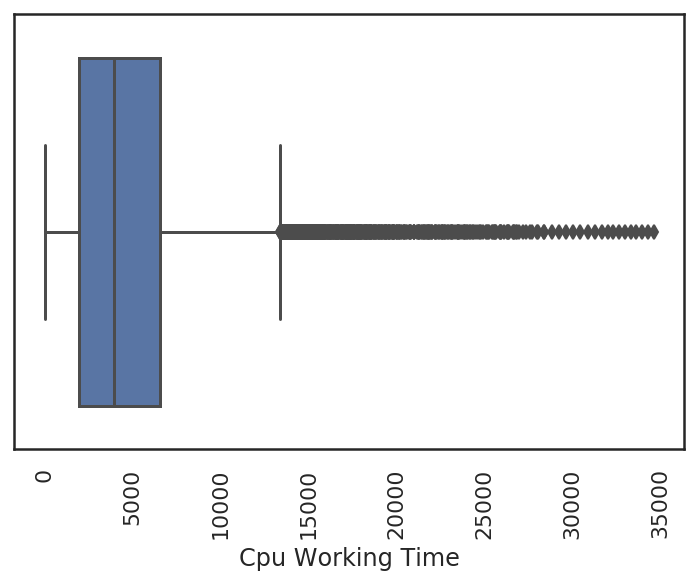

Cpu Working Time 1.905575137889361


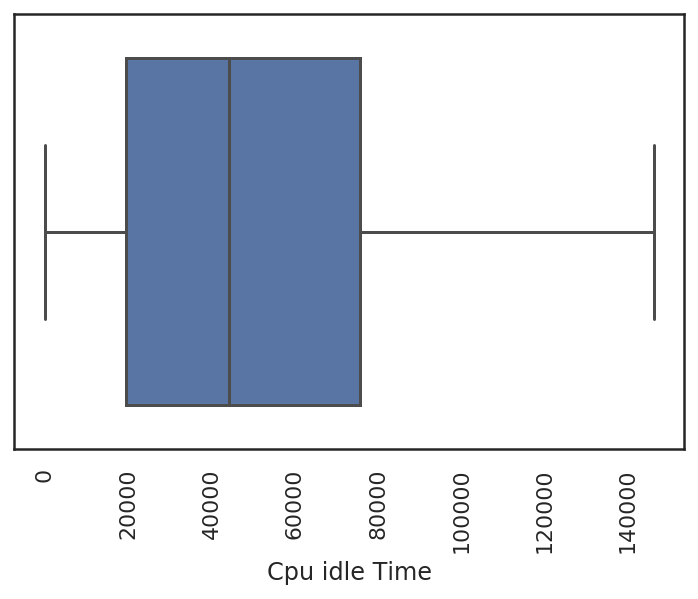

Cpu idle Time 0.3880750453031678


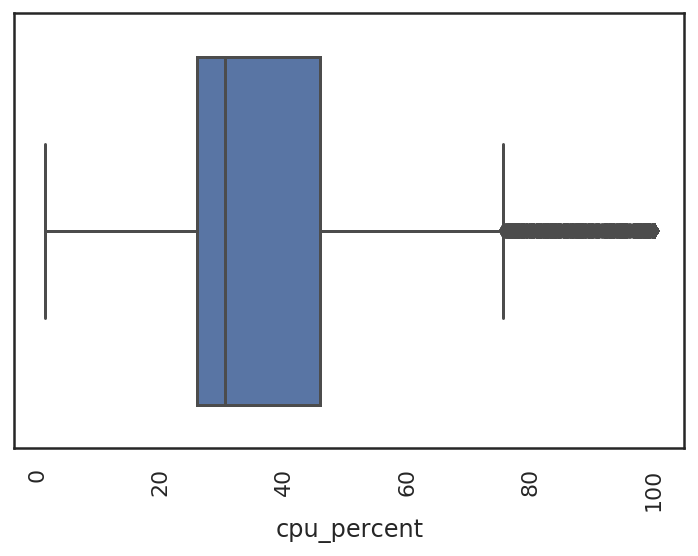

cpu_percent 1.6139431934629864


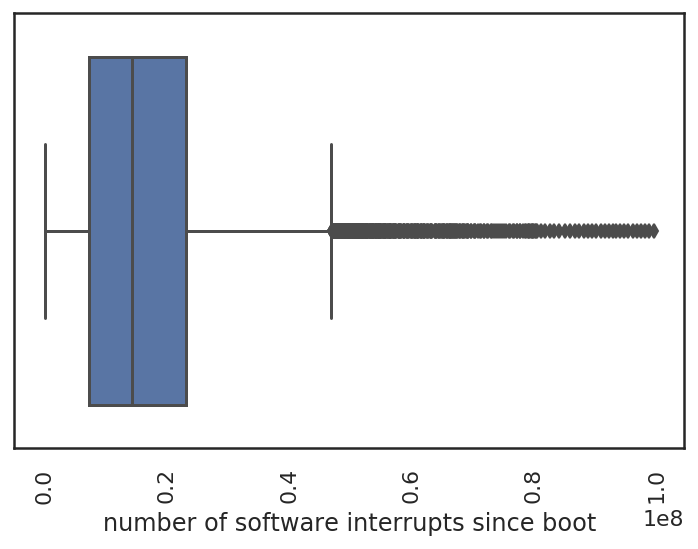

number of software interrupts since boot 1.4445083517319206


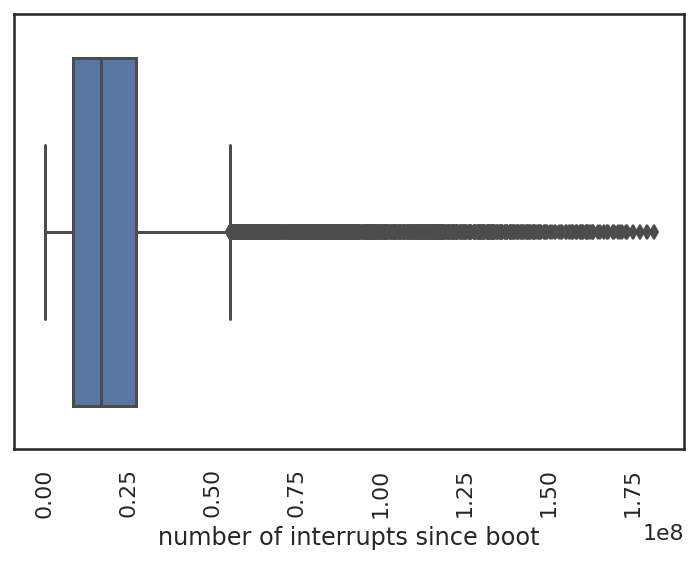

number of interrupts since boot 2.8178343439800146


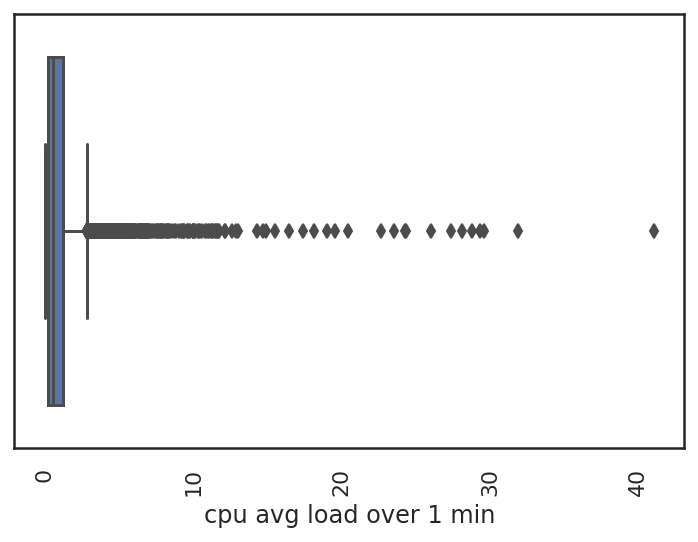

cpu avg load over 1 min 7.481986657048938


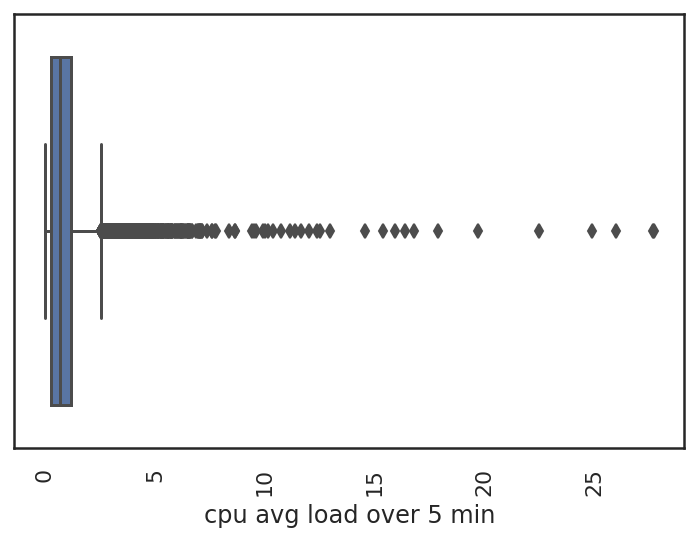

cpu avg load over 5 min 5.8175846524697175


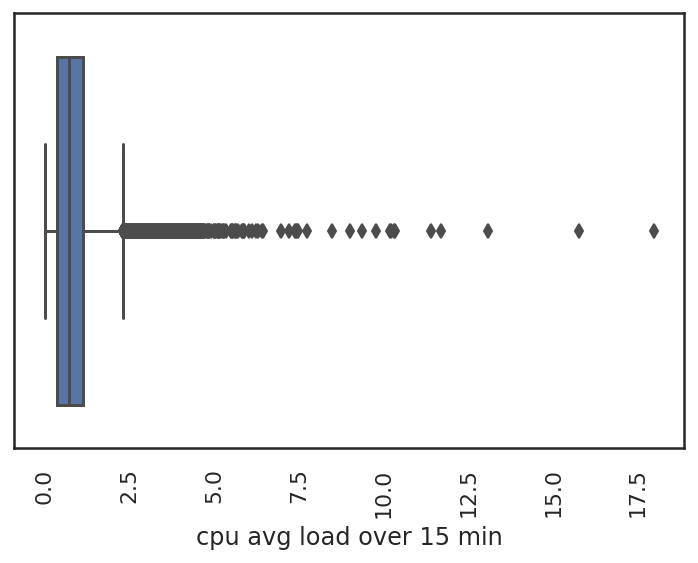

cpu avg load over 15 min 3.0372164263843793


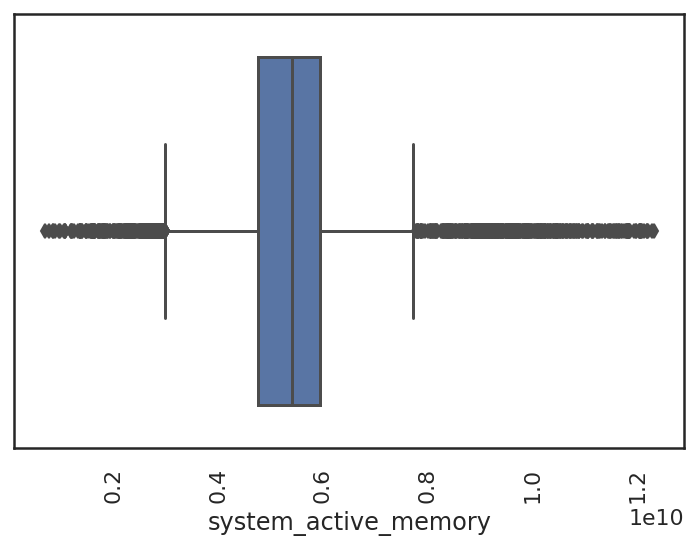

system_active_memory 1.066467103841101


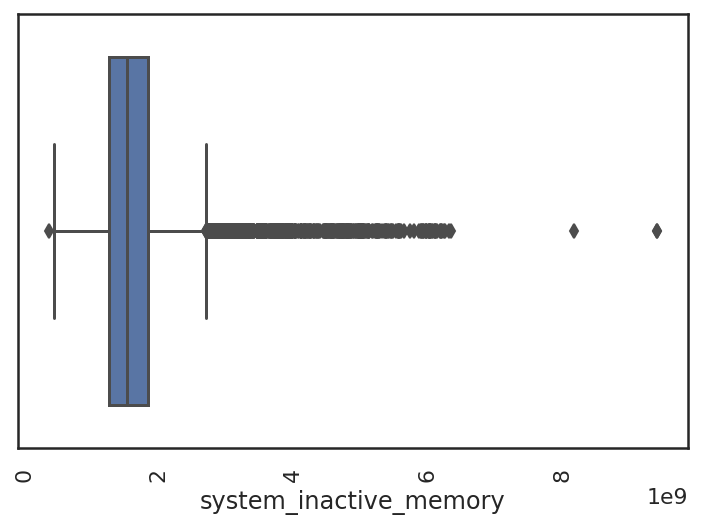

system_inactive_memory 2.8756710676533075


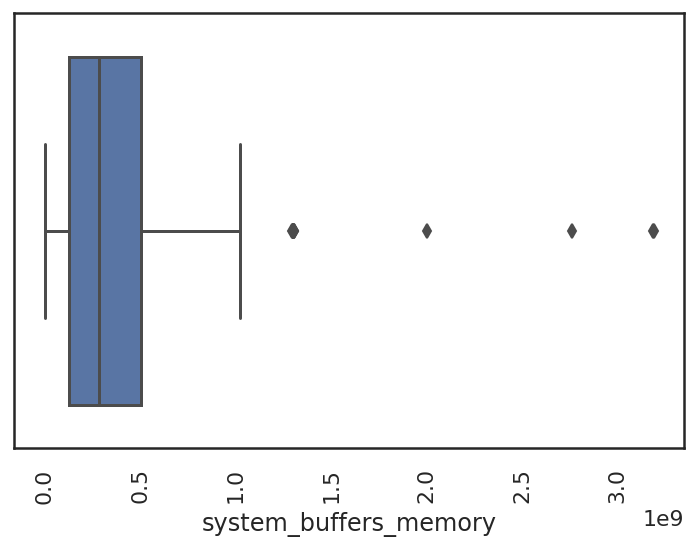

system_buffers_memory 0.93044362500607


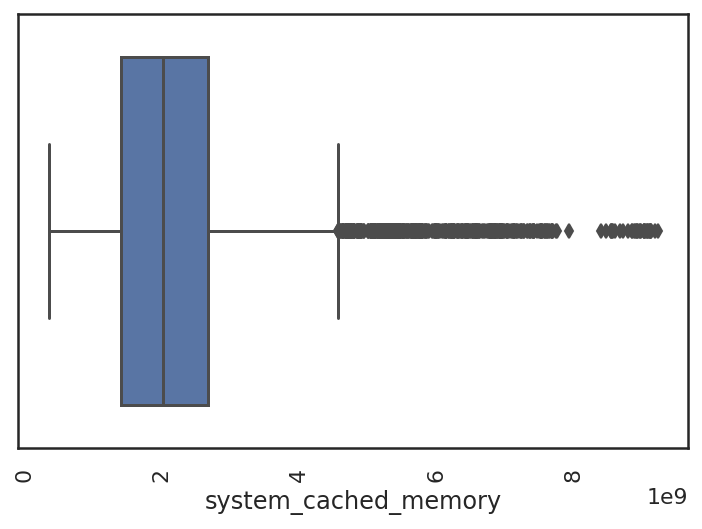

system_cached_memory 1.8539638361135313


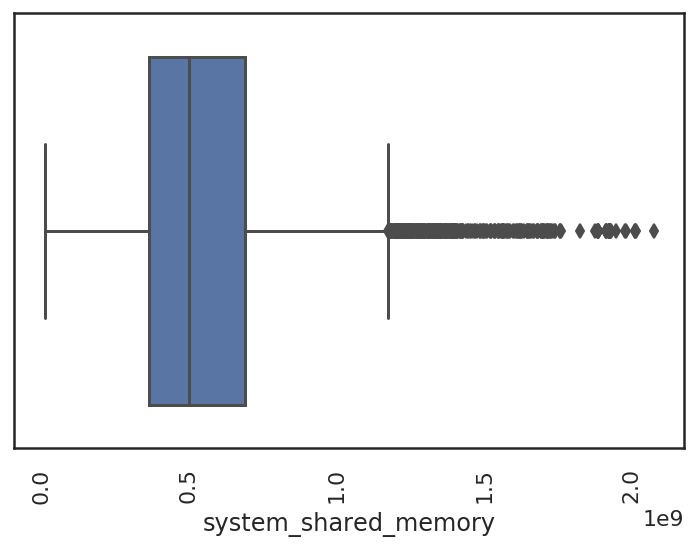

system_shared_memory 1.3398243293935468


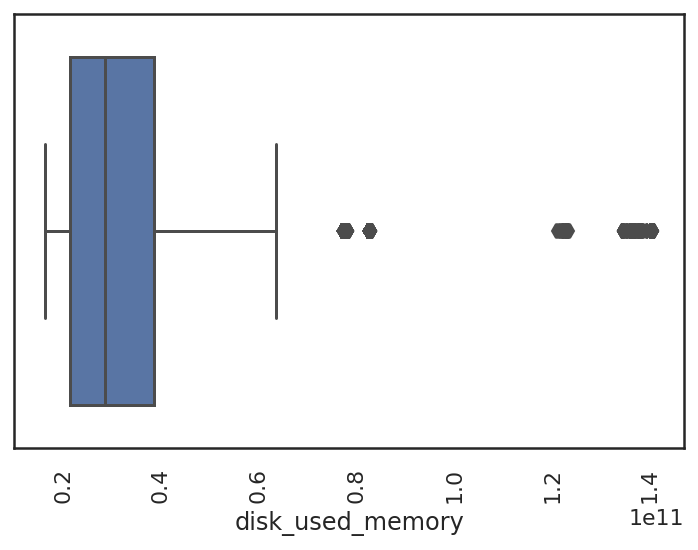

disk_used_memory 2.21198607746459


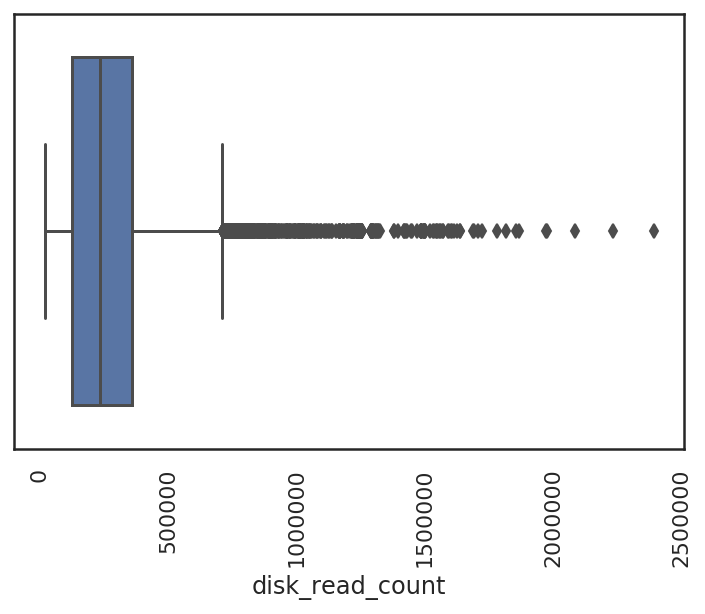

disk_read_count 2.4073905376583076


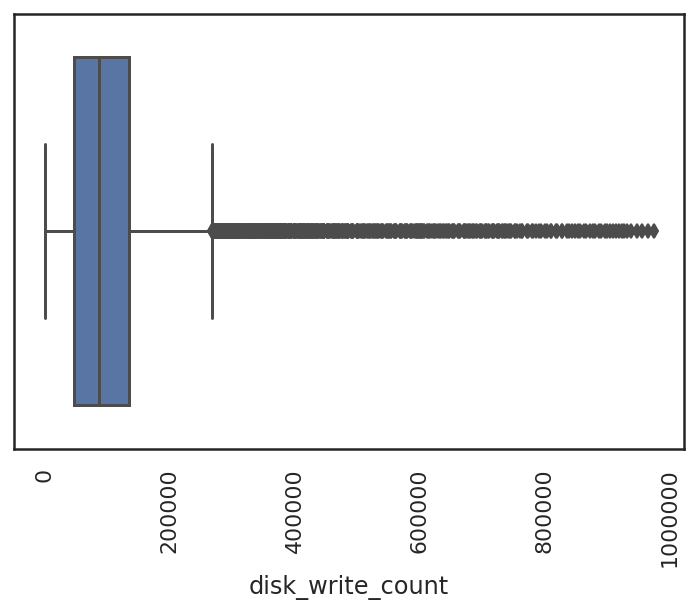

disk_write_count 3.313764077390953


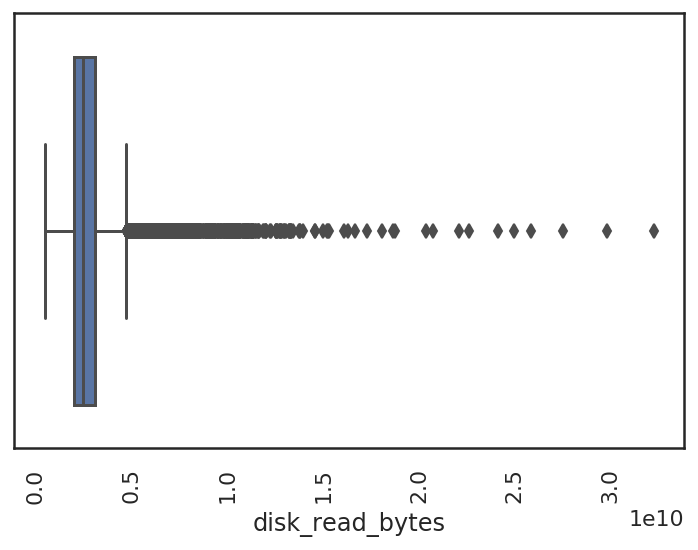

disk_read_bytes 3.8452400241685


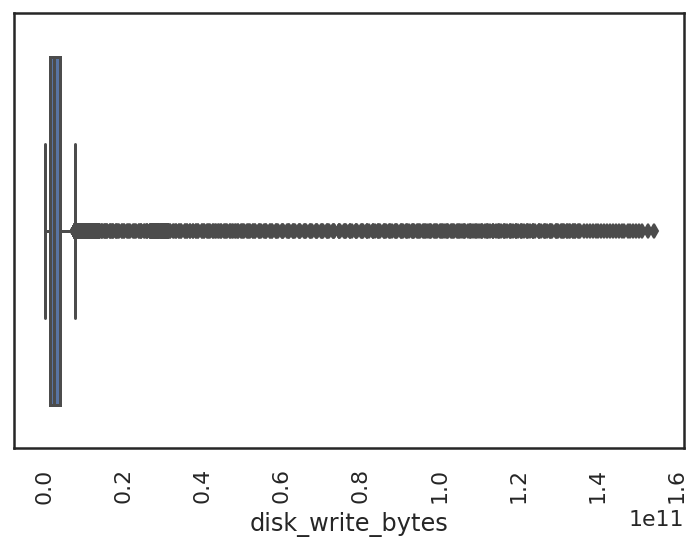

disk_write_bytes 7.436637379137751


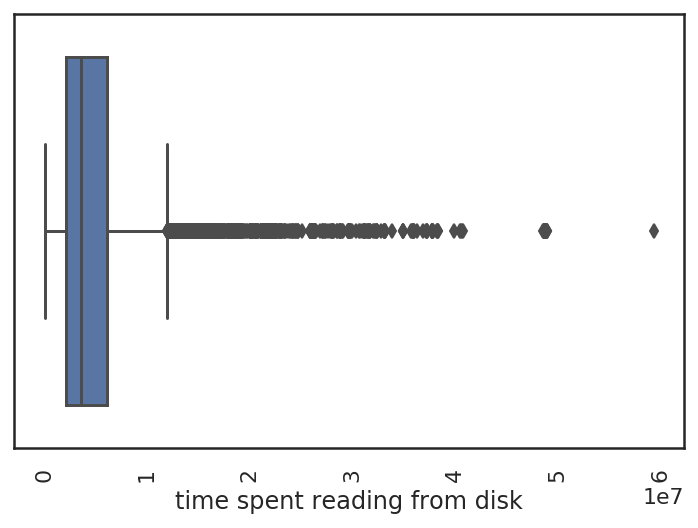

time spent reading from disk 3.0443547705846457


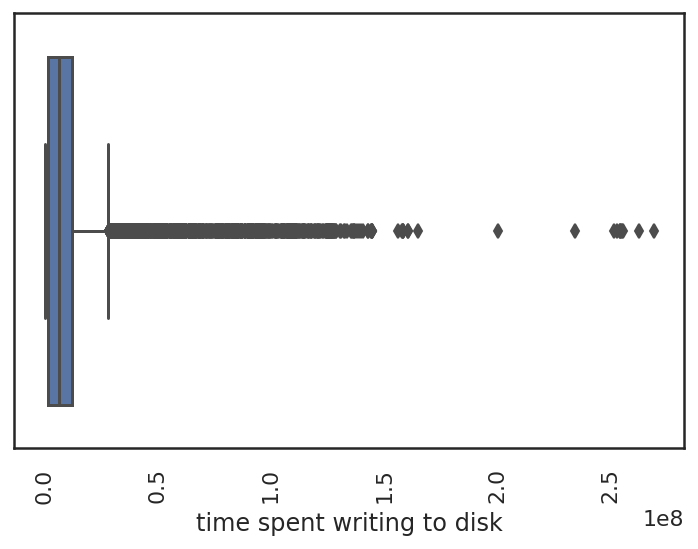

time spent writing to disk 4.289882217842598


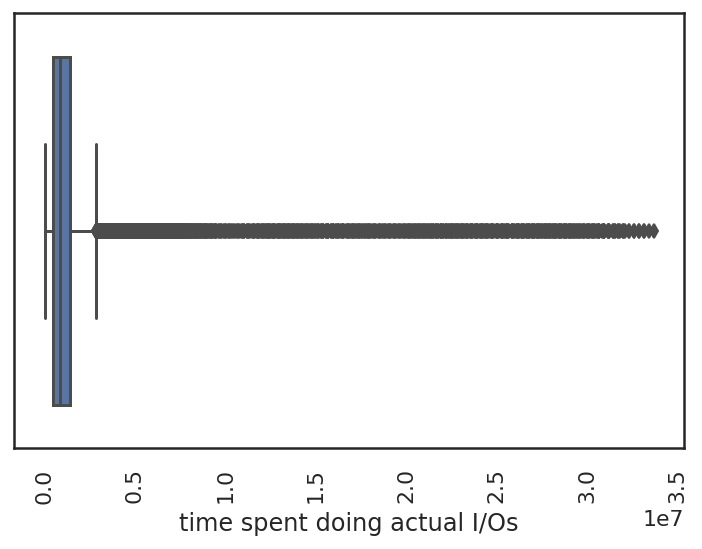

time spent doing actual I/Os 4.782890781804296


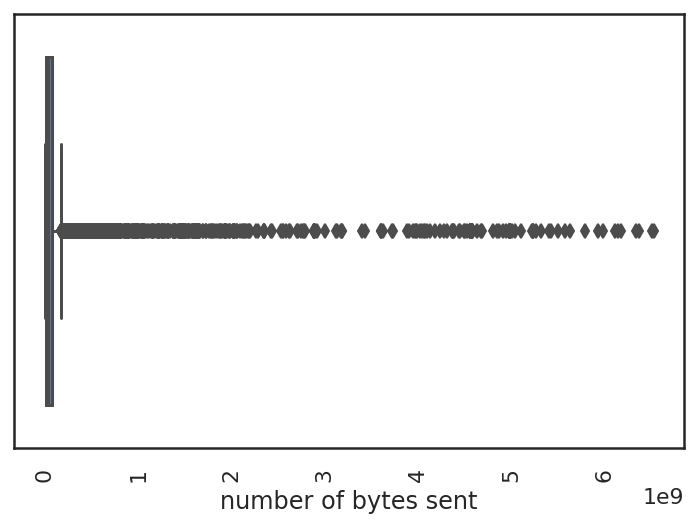

number of bytes sent 8.508947733862158


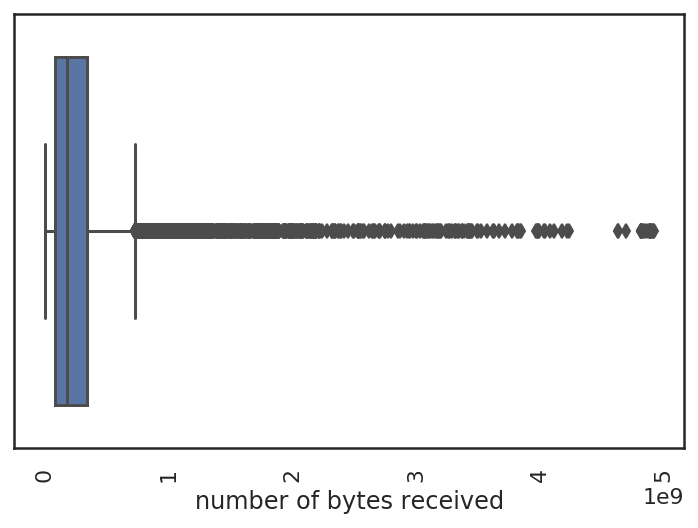

number of bytes received 4.373221664244385


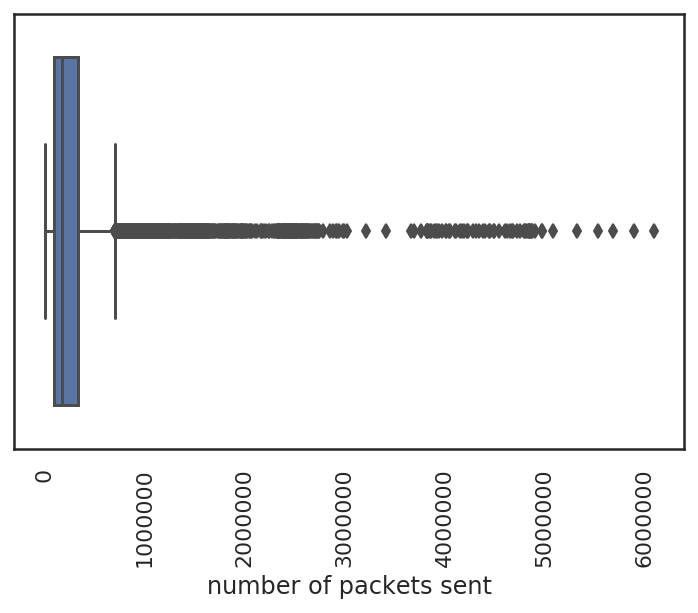

number of packets sent 5.829990165968182


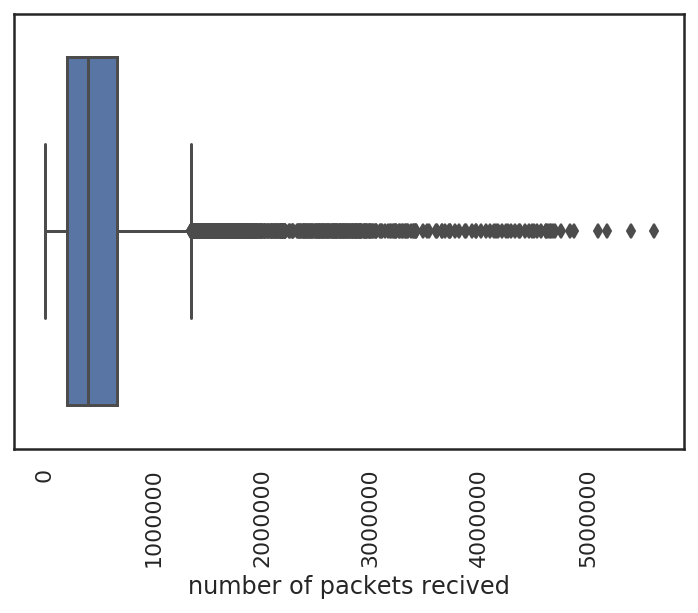

number of packets recived 3.136704668733382


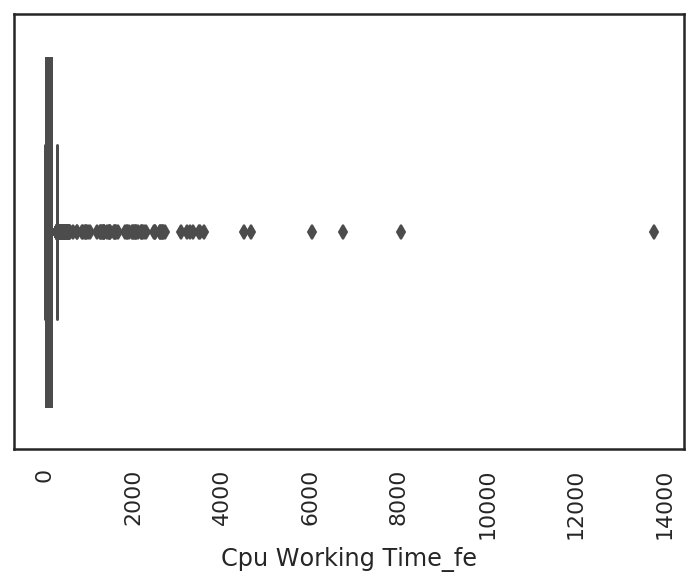

Cpu Working Time_fe 27.708018326254752


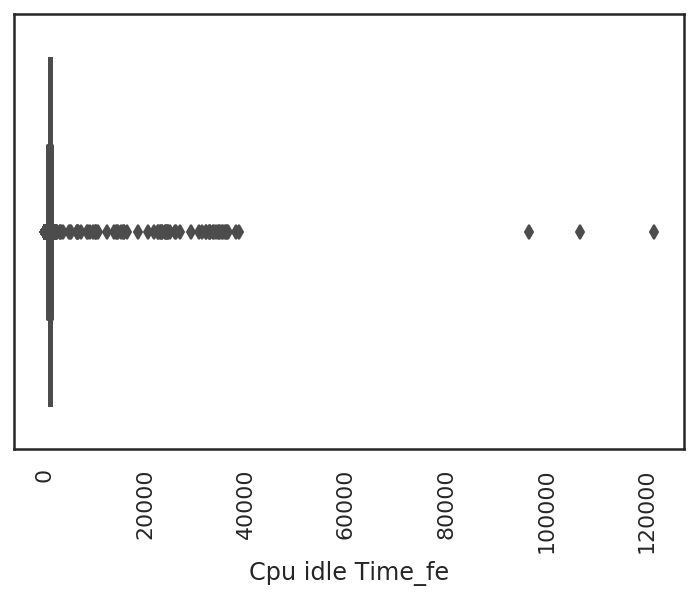

Cpu idle Time_fe 30.53833795940274


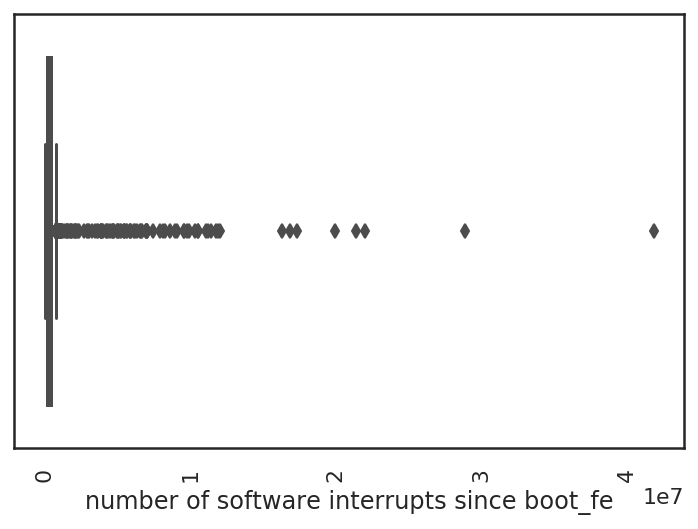

number of software interrupts since boot_fe 27.16535382809718


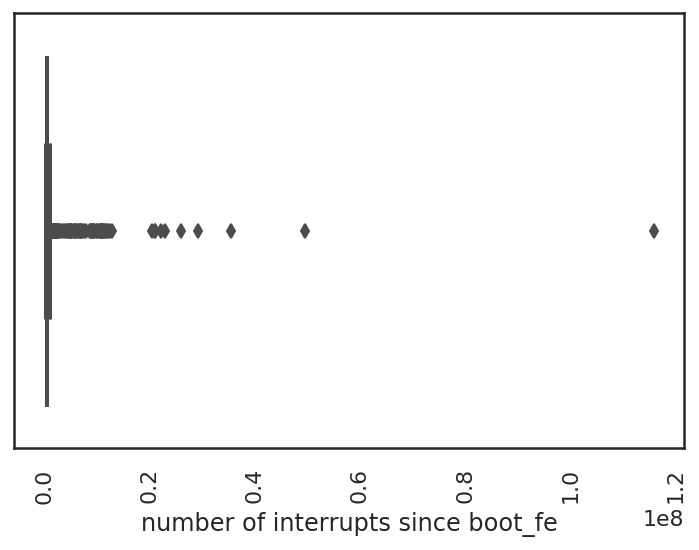

number of interrupts since boot_fe 52.91974059831668


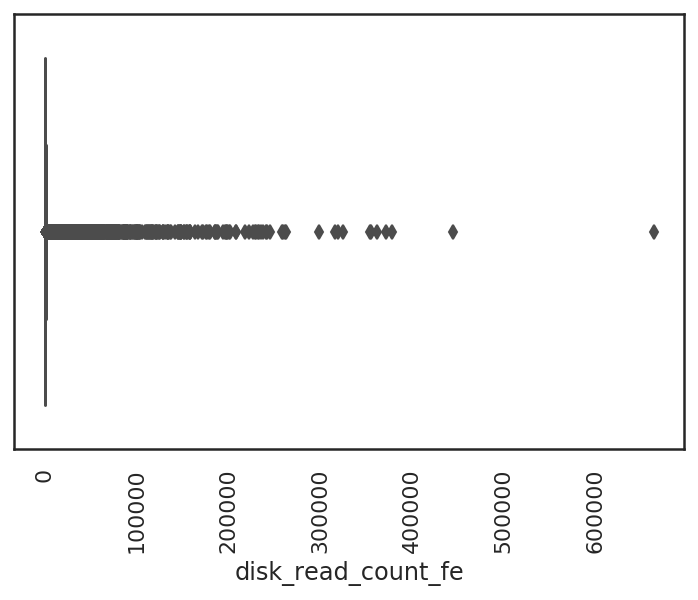

disk_read_count_fe 11.838788686139246


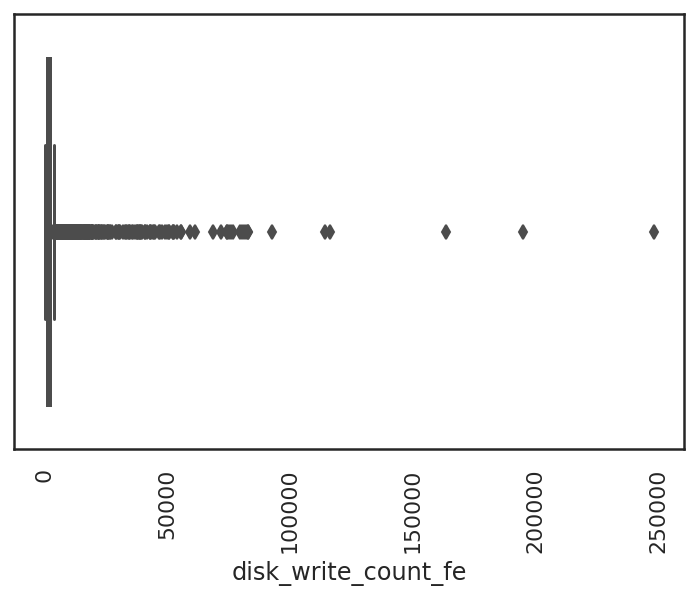

disk_write_count_fe 20.378526804887247


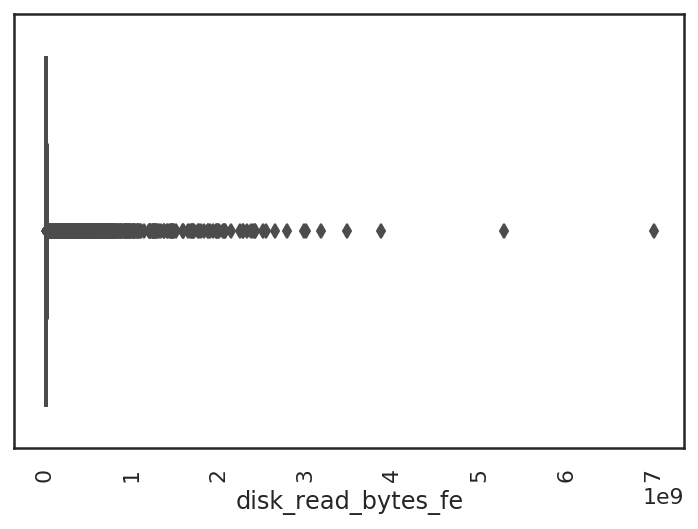

disk_read_bytes_fe 13.104709810978223


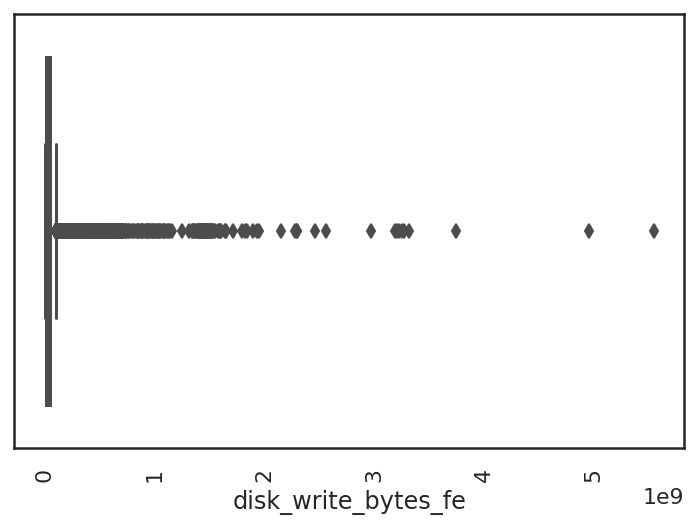

disk_write_bytes_fe 5.912850661444217


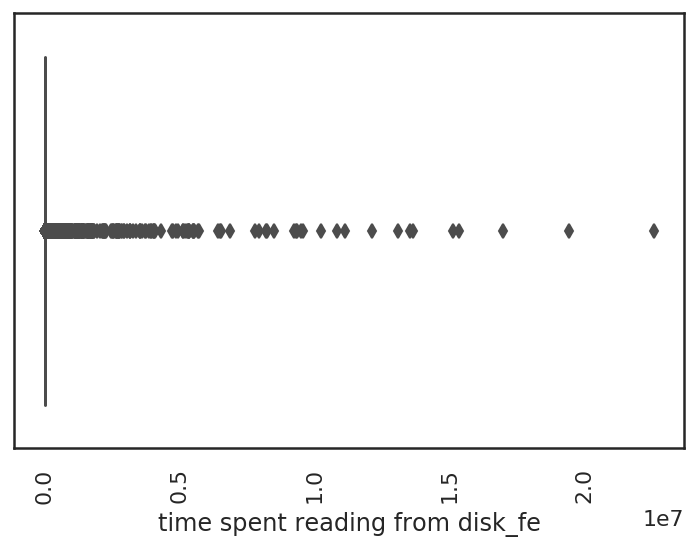

time spent reading from disk_fe 20.660566151782394


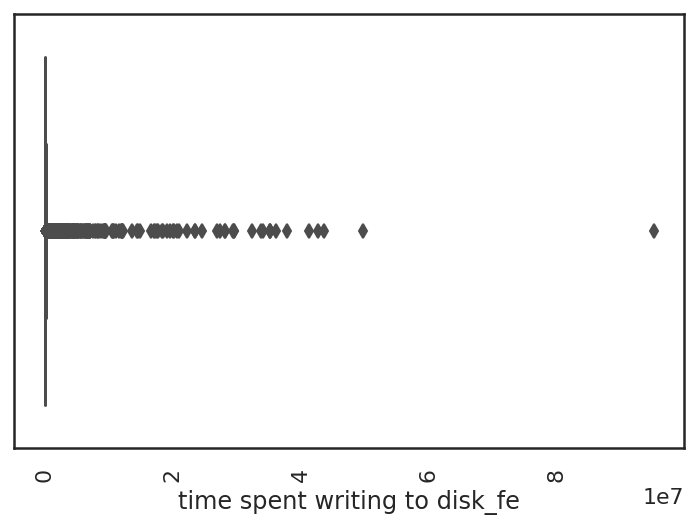

time spent writing to disk_fe 24.49028291724455


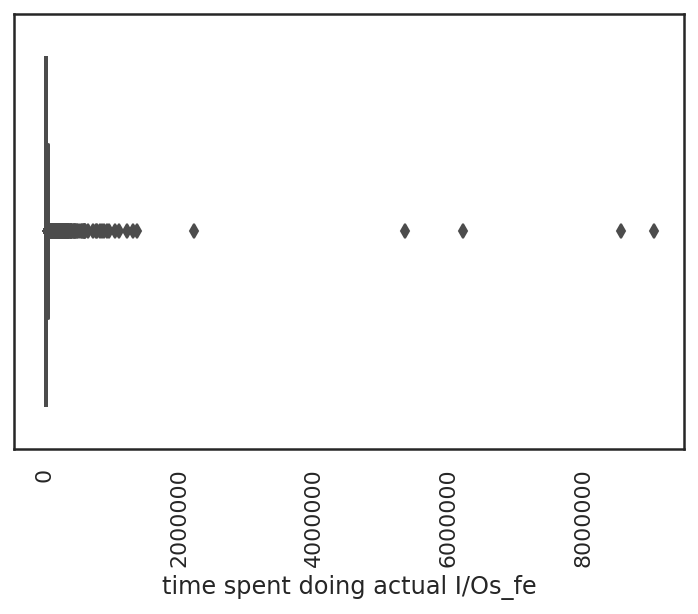

time spent doing actual I/Os_fe 39.753687978522294


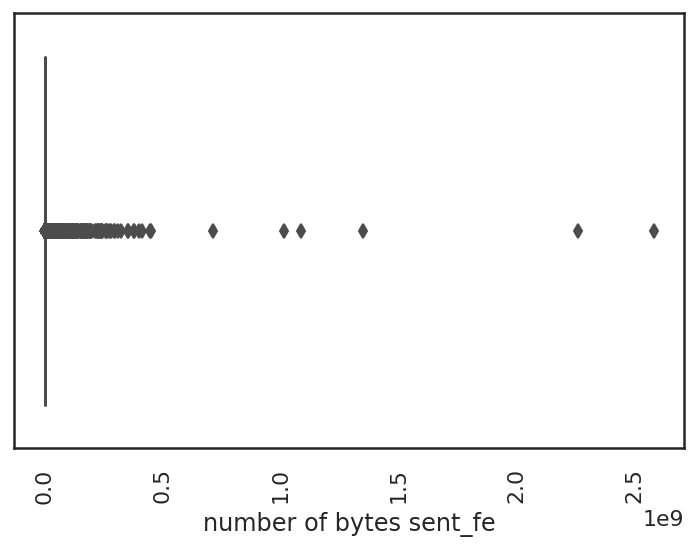

number of bytes sent_fe 44.19211916800406


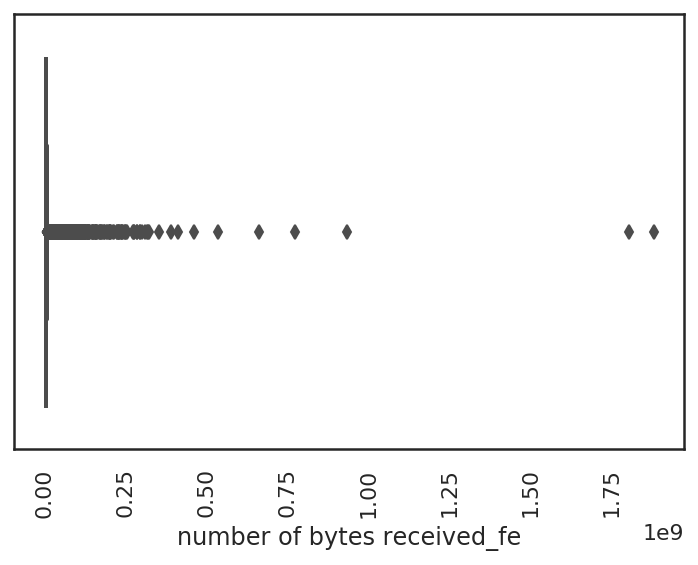

number of bytes received_fe 31.4109296151691


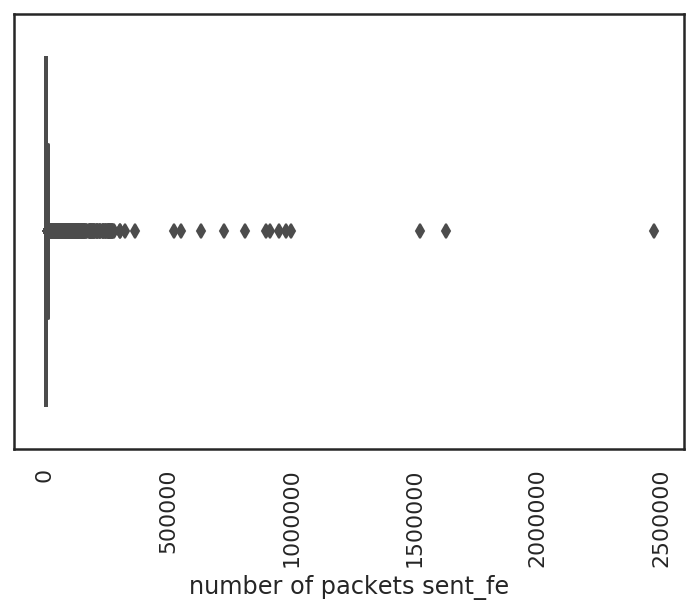

number of packets sent_fe 32.695037430080866


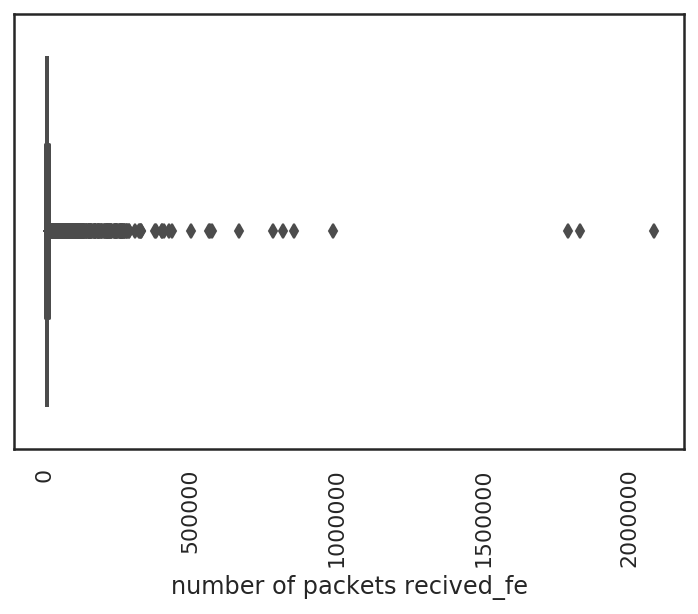

number of packets recived_fe 27.841771276820143


In [144]:
def visualization(data):

#     dt = data[data['user_name']=='5152ibrahim@gmail.com']
#     dt2 = dt[dt['Dates']==dt['Dates'].unique()[2]]
    
    for i in data.columns:
        if data[i].dtype != 'object':
#             print(data.columns[i])
#             plt.figure(figsize=(15,7))
#             sb.lineplot(x='Time', y=data.columns[i], data=data)
#             sb.distplot(data[i])
            sb.boxplot(data[i])
            
            plt.xticks(rotation=90)
            plt.show()
            print(i,data[i].skew())
visualization(final_df)

In [59]:
# print(df.mean(),df.median())

In [60]:
# (np.log(final_df["cpu avg load over 5 min"])==(-np.inf)).sum()
# np.square(final_df["number of packets recived_fe"]).skew()
if(np.nan <1):
    print("nan")

In [142]:
# def feature_engineering(features): by Prayas
user_name = data['user_name'].unique()
final_df = pd.DataFrame()
# print(user_name)
for u_name in user_name:
    df = data[data['user_name'] == u_name]
    df.sort_values('DateTime', inplace=True)
    df.reset_index(drop=True, inplace=True)
#     print(df.shape)
    print(u_name)
    for col in feature_eng_col:
        l1 =[]
        l1.append(df[col].iloc[0])
        for index in range(1,len(df)):
            
            if (df["Dates"].iloc[index] == df["Dates"].iloc[index-1]):
                # As when curr smaller than prev
                if (df[col].iloc[index]-df[col].iloc[index-1]) <= 0:
                    l1.append(df[col].iloc[index])
                    # curr > prev
                elif (df[col].iloc[index]-df[col].iloc[index-1]) > 0:
                    l1.append(df[col].iloc[index]-df[col].iloc[index-1])
#                 # commenting below as above will take it competely    
#                 elif index == len(df)-1:
#                     if (df[col].iloc[index]-df[col].iloc[index-1]) < 0:
#                         l2.append(np.average(l1))
#                         l2.extend(l1)
#                         l1=[]
#                     else:
# #                         l1.append(df[col].iloc[index]-df[col].iloc[index-1])
#                         l2.append(np.average(l1))
#                         l2.extend(l1)
#                         l2.append(df[col].iloc[index])
#                 else :
#                     l1.append(df[col].iloc[index]-df[col].iloc[index-1])
                
            else:
                l1.append(df[col].iloc[index])
#             print(index)
#         print(col)
        df[col+"_fe"]=l1
    print(u_name, len(l1), df.shape)
    final_df = final_df.append(df)
print(final_df.shape)

In [127]:
final_df.shape

(31698, 45)

In [128]:
new_df = remove_col(final_df,feature_eng_col)

In [129]:
new_df = std(new_df)

In [130]:
final_df = new_df

cpu_percent                                     1.118689
cpu avg load over 1 min                         8.403356
cpu avg load over 5 min                         5.760682
cpu avg load over 15 min                        3.323552
system_active_memory                            0.329230
system_inactive_memory                          2.952100
system_buffers_memory                           1.221328
system_cached_memory                            1.734443
system_shared_memory                            1.429877
disk_used_memory                                2.382491
Cpu Working Time_fe                            18.442984
Cpu idle Time_fe                               16.404819
number of software interrupts since boot_fe    20.660516
number of interrupts since boot_fe             32.616001
disk_read_count_fe                              2.525660
disk_write_count_fe                            18.048222
disk_read_bytes_fe                              1.848200
disk_write_bytes_fe            

In [131]:
def skewness(df):
    for col in df.columns:
        if is_numeric_dtype(df[col]):
            if df[col].skew() <0.5 and df[col].skew() > -0.5:
                continue
            median = df[col].median()
            mean = df[col].mean()
            print(col)
            skews = []

            skews.append(np.sqrt(df[col]).skew())
            skews.append(np.cbrt(df[col]).skew())
            skews.append(np.log(df[col]).skew())

            skew_dup = skews
            for index in range(0,len(skews)):
                if skew_dup[index] < 0: 
                    skew_dup[index] *= -1
            index = skew_dup.index(min(skew_dup))
            
            if skews[index]>0.5 or skews[index] < -0.5:
                df[col]= np.sqrt(np.sqrt(df[col]))
                print("double sqrt",df[col].skew())
                continue
            
            if index==0:
                df[col] = np.sqrt(df[col])
#                 print("sqrt",skews[index])
            elif index==1:
                df[col] = np.cbrt(df[col])
#                 print("cbrt",skews[index])
            else:
                df[col] = np.log(df[col])
#                 print("log",skews[index])
    return df

In [132]:
d=skewness(new_data)

Cpu Working Time
Cpu idle Time
cpu_percent
number of software interrupts since boot
number of interrupts since boot
cpu avg load over 1 min
cpu avg load over 5 min
cpu avg load over 15 min
system_inactive_memory
system_buffers_memory
system_cached_memory
system_shared_memory
disk_used_memory
disk_read_count
disk_write_count
disk_read_bytes
disk_write_bytes
time spent reading from disk
time spent writing to disk
time spent doing actual I/Os
number of bytes sent
number of bytes received
number of packets sent
number of packets recived
Cpu Working Time_fe
Cpu idle Time_fe
double sqrt 5.325402180720574
number of software interrupts since boot_fe
number of interrupts since boot_fe
disk_read_count_fe
double sqrt 0.023952337989700274
disk_write_count_fe
double sqrt 1.5912497810081951
disk_read_bytes_fe
disk_write_bytes_fe
time spent reading from disk_fe
double sqrt 0.5379798384617219
time spent writing to disk_fe
time spent doing actual I/Os_fe
number of bytes sent_fe
number of bytes received

In [119]:
# visualization(d)

In [143]:
# def feature_engineering(features):
user_name = data['user_name'].unique()
final_df = pd.DataFrame()
# print(user_name)
for u_name in user_name:
    df = data[data['user_name'] == u_name]
    df.sort_values('DateTime', inplace=True)
    df.reset_index(drop=True, inplace=True)
#     print(df.shape)
    print(u_name)
    for col in feature_eng_col:
        l1 =[]
        l2 = []
        for index in range(1,len(df)):
            
            if (df["Dates"].iloc[index] == df["Dates"].iloc[index-1]):
                if (df[col].iloc[index]-df[col].iloc[index-1]) < 0:
                    l2.append(np.average(l1))
                    l2.extend(l1)
                    l1=[]
                elif index == len(df)-1:
                    if (df[col].iloc[index]-df[col].iloc[index-1]) < 0:
                        l2.append(np.average(l1))
                        l2.extend(l1)
                        l1=[]
                    else:
#                         l1.append(df[col].iloc[index]-df[col].iloc[index-1])
                        l2.append(np.average(l1))
                        l2.extend(l1)
                        l2.append(df[col].iloc[index])
                else :
                    l1.append(df[col].iloc[index]-df[col].iloc[index-1])
                
            else:
                l2.append(np.average(l1))
                l2.extend(l1)
                l1=[]
#             print(index)
#         print(col)
        df[col+"_fe"]=l2
    print(u_name, len(l2), df.shape)
    final_df = final_df.append(df)
print(final_df.shape)

kadamsagar039@gmail.com
kadamsagar039@gmail.com 774 (774, 45)
akshaykumarmhindanavees@gmail.com
akshaykumarmhindanavees@gmail.com 711 (711, 45)
rohankadam662
rohankadam662 804 (804, 45)
aniketmule218@gmail.com
aniketmule218@gmail.com 738 (738, 45)
gaurav23091996@gmail.com
gaurav23091996@gmail.com 853 (853, 45)
honeykrsingh16@gmail.com
honeykrsingh16@gmail.com 747 (747, 45)
sheetalbedarkar96@gmail.com
sheetalbedarkar96@gmail.com 645 (645, 45)
khatalapeksha@gmail.com
khatalapeksha@gmail.com 693 (693, 45)
nilamkurhade87@gmail.com
nilamkurhade87@gmail.com 718 (718, 45)
kuchipudiyuvaraj@gmail.com
kuchipudiyuvaraj@gmail.com 676 (676, 45)
nishigandhalondhe91@gmail.com
nishigandhalondhe91@gmail.com 735 (735, 45)
samadhanmahajan73@gmail.com
samadhanmahajan73@gmail.com 817 (817, 45)
poojatodkar124@gmail.com
poojatodkar124@gmail.com 726 (726, 45)
singh.saurabh3333@gmail.com
singh.saurabh3333@gmail.com 714 (714, 45)
vidyaramesh1428@gmail.com
vidyaramesh1428@gmail.com 815 (815, 45)
anuj.bhelkar@gma

ValueError: Length of values does not match length of index

In [12]:
final_df.drop(columns=feature_eng_col, inplace=True)
final_df.shape

(31297, 30)

In [ ]:
# final_df.columns

In [ ]:
# for col in final_df.columns:
#     if final_df[col].dtypes != 'object':
#         print(col, min(final_df[col]))

In [ ]:
# take = ['Cpu Working Time_fe', 'cpu_percent', 'cpu avg load over 1 min',
#        'cpu avg load over 5 min', 'cpu avg load over 15 min',  'disk_read_count_fe',
#        'disk_write_count_fe','time spent reading from disk_fe', 'time spent writing to disk_fe',
#        'time spent doing actual I/Os_fe', 'Dates', 'user_name', 'Time']


# for col in final_df.columns:
#     if col not in take:
#         final_df.drop(columns=col, inplace=True)

In [ ]:
final_data = final_df
final_data.shape

In [ ]:
# print(final_data['DateTime'].dtype)
# final_df.dtypes
final_df.shape

In [124]:
from sklearn.preprocessing import RobustScaler
def std(data):
    # standardize the data attributes
    for col in data.columns:
        if data[col].dtype == 'object':
            data = data.drop(columns=col)
    sc =RobustScaler()
    standardized_X = sc.fit_transform(data)
    new_data = pd.DataFrame(standardized_X, columns=data.columns)
    
    return new_data
new_data = std(final_df)

In [118]:
final_df.shape, new_data.shape


((31698, 30), (31698, 25))

In [21]:
new_data['Dates'] = list(final_df['Dates'])
new_data['user_name'] = list(final_df['user_name'])
new_data['Time'] = list(final_df['Time'])

cpu avg load over 1 min


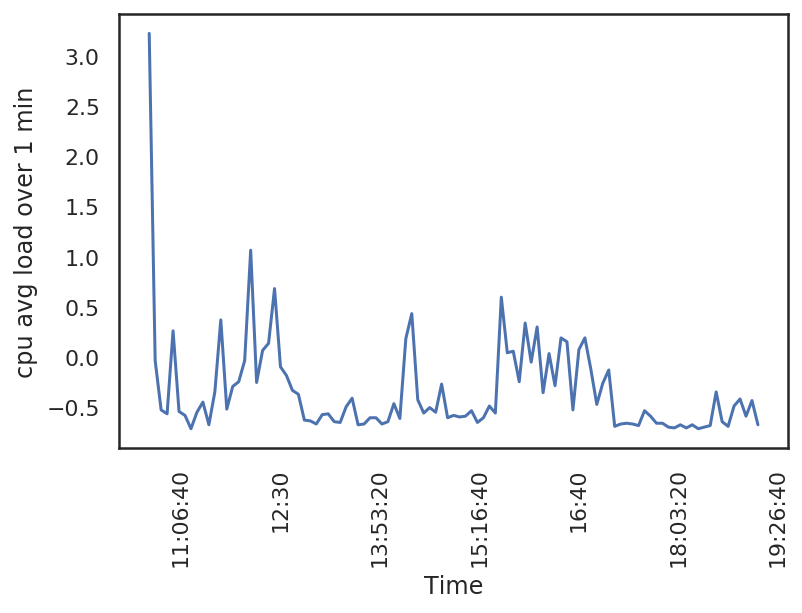

cpu avg load over 5 min


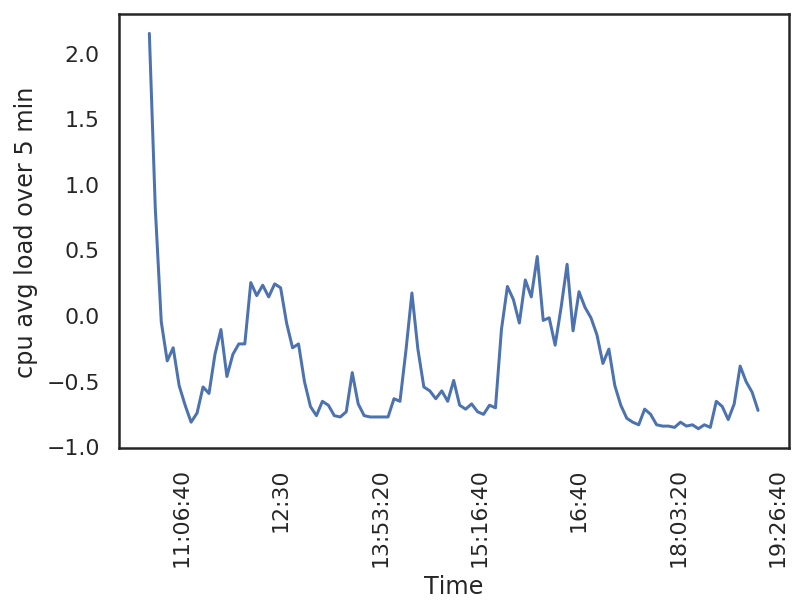

cpu avg load over 15 min


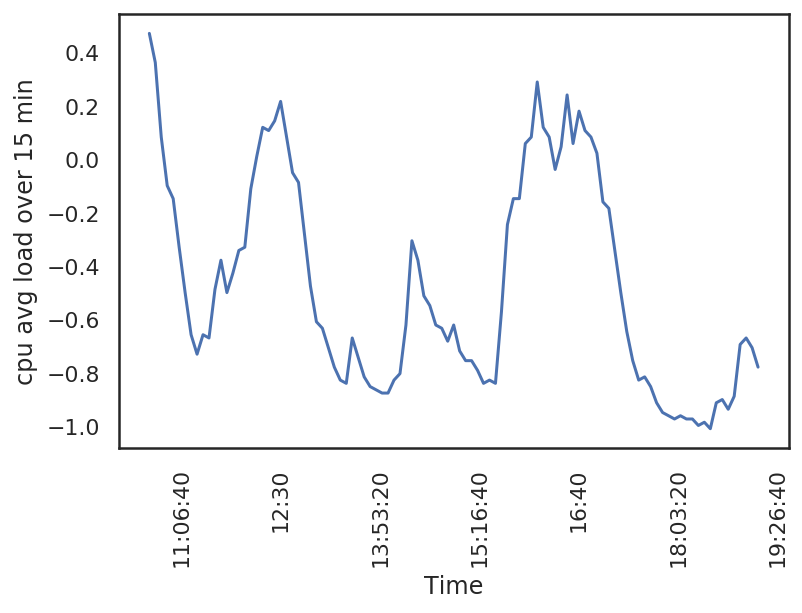

system_active_memory


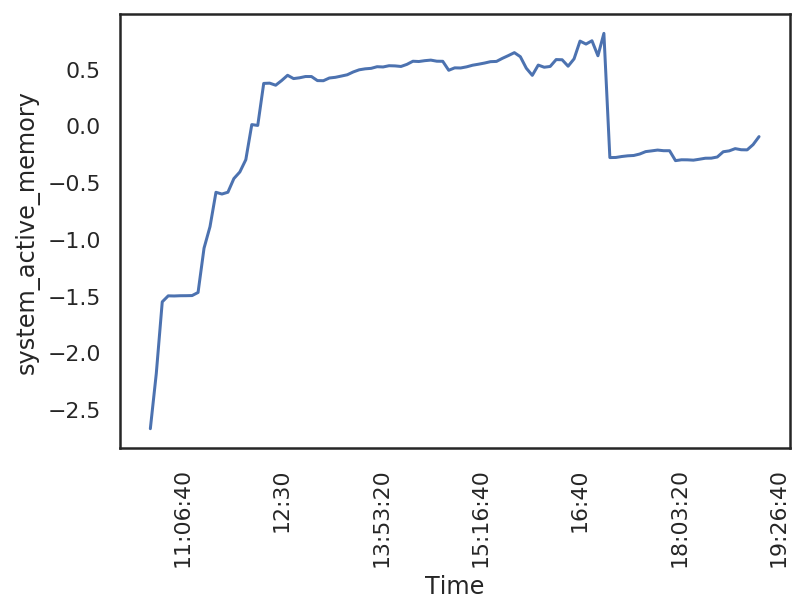

system_inactive_memory


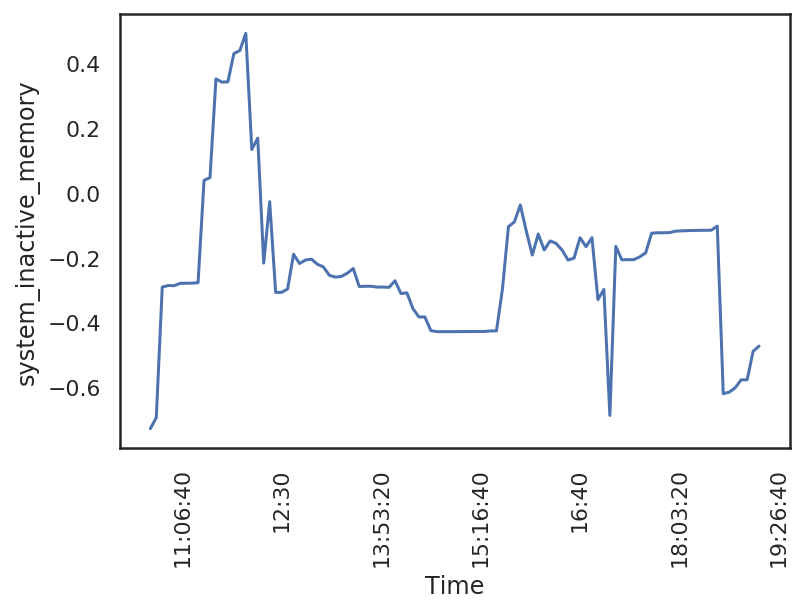

system_buffers_memory


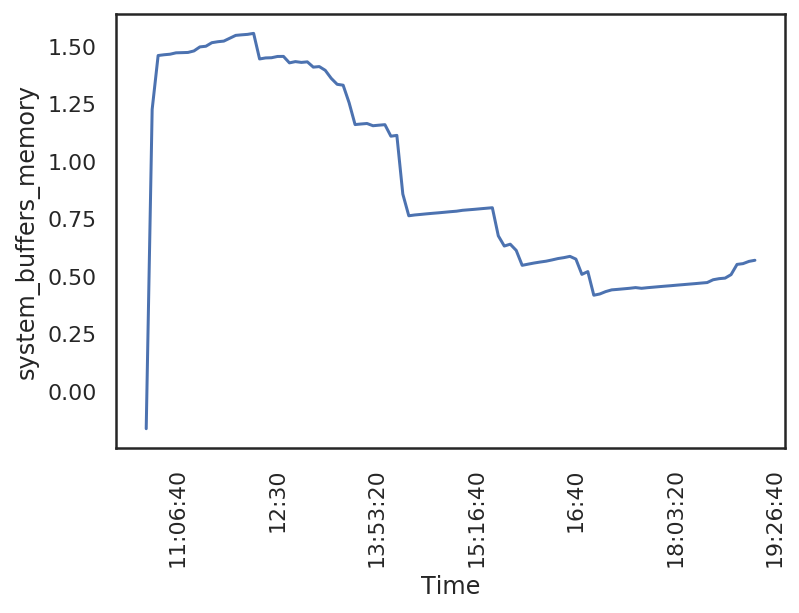

system_cached_memory


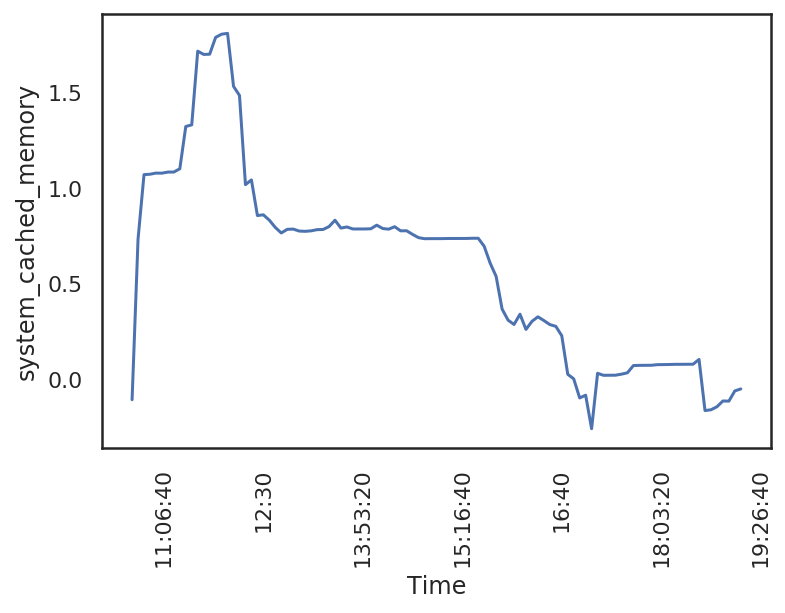

system_shared_memory


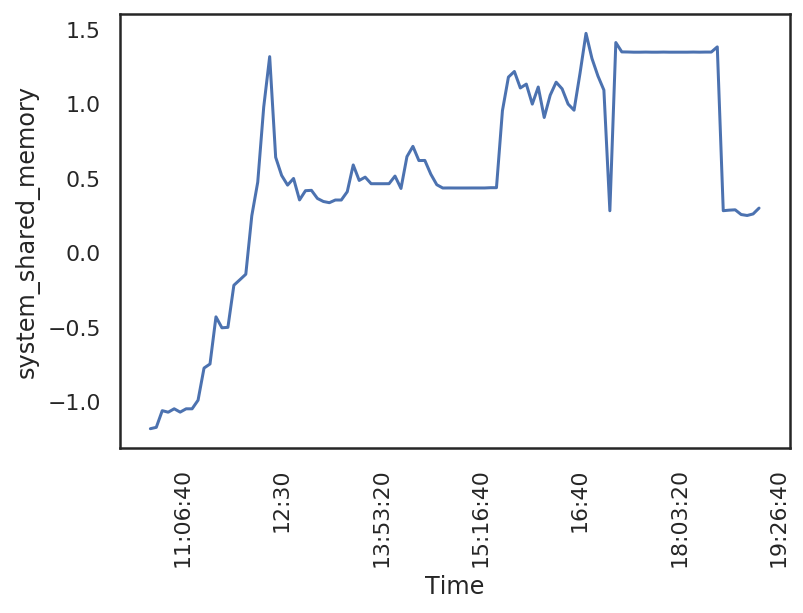

disk_used_memory


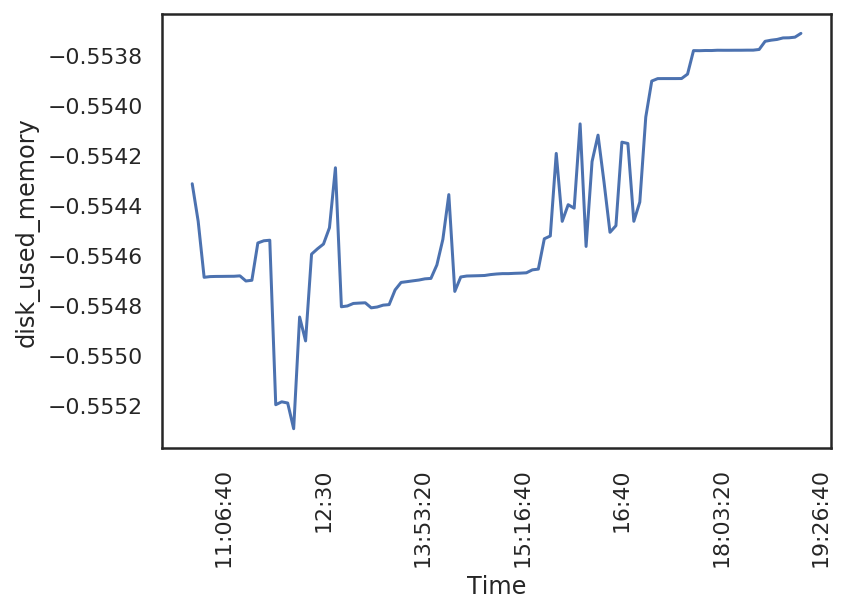

Cpu Working Time_fe


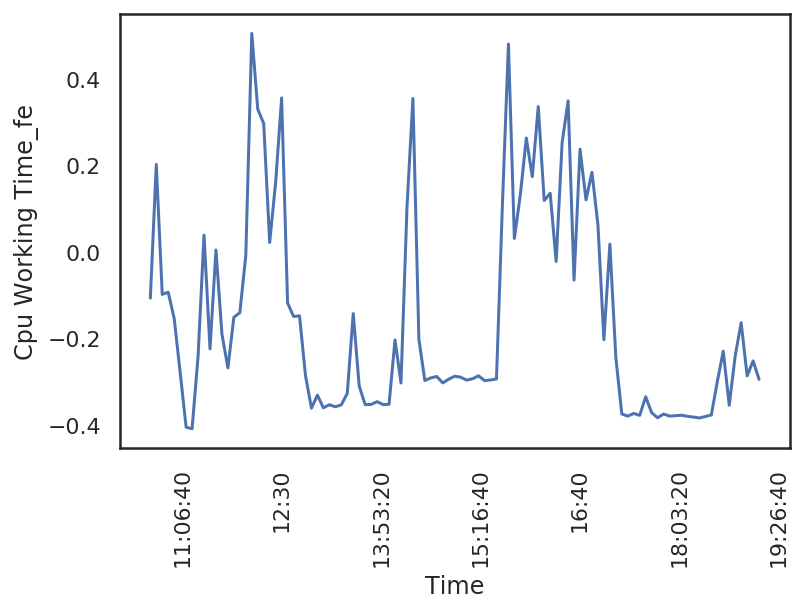

Cpu idle Time_fe


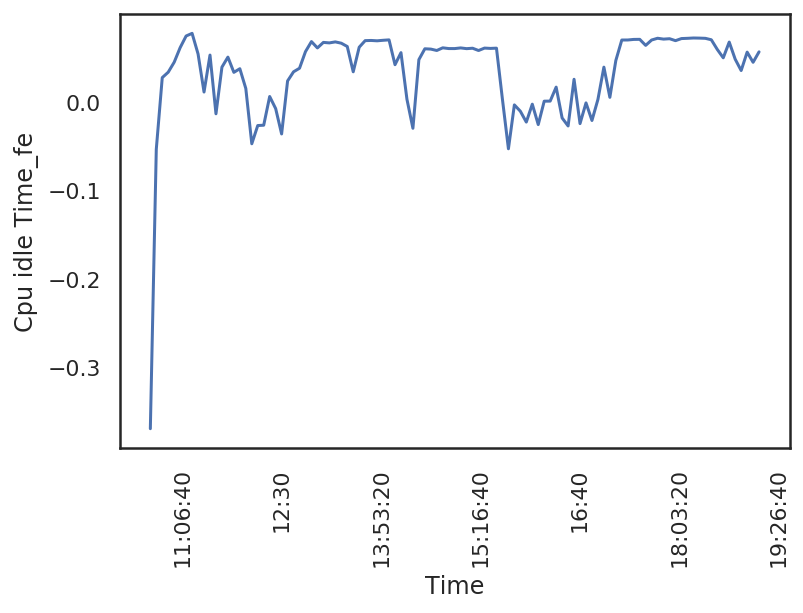

number of software interrupts since boot_fe


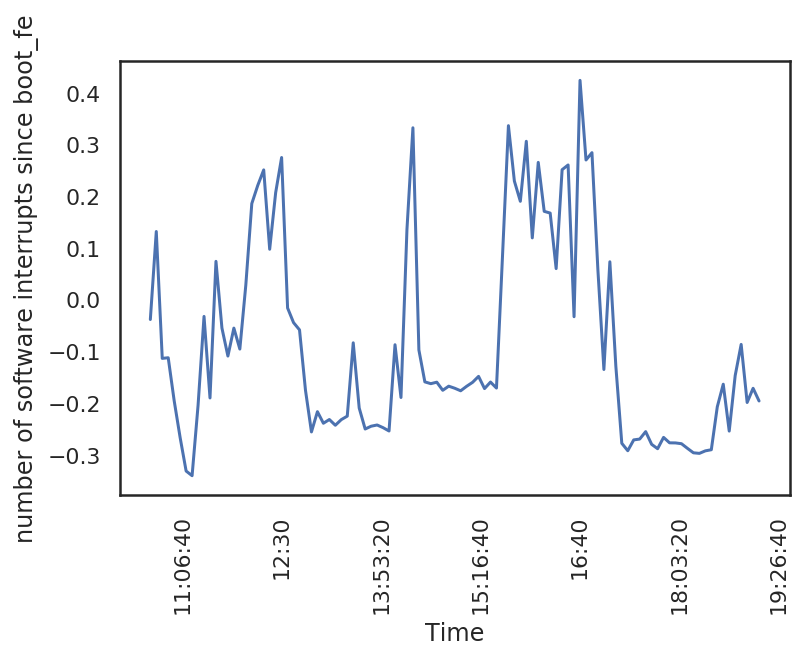

number of interrupts since boot_fe


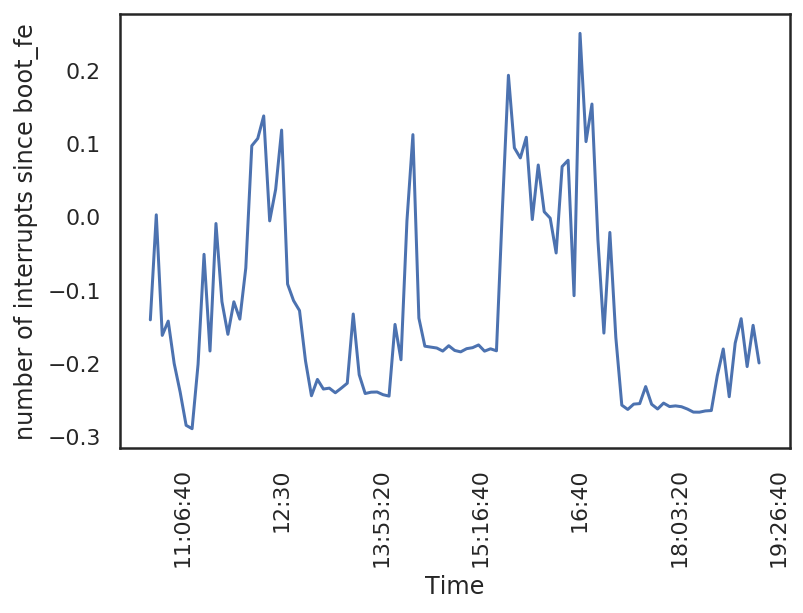

disk_read_count_fe


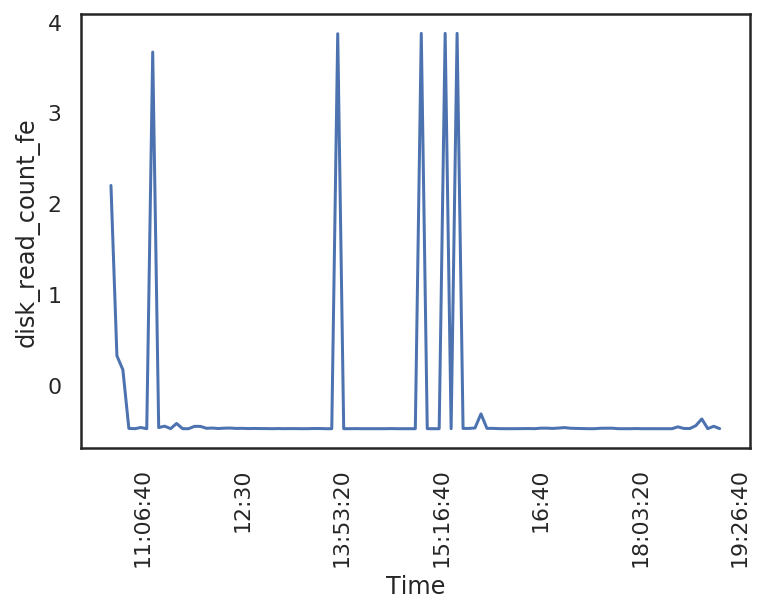

disk_write_count_fe


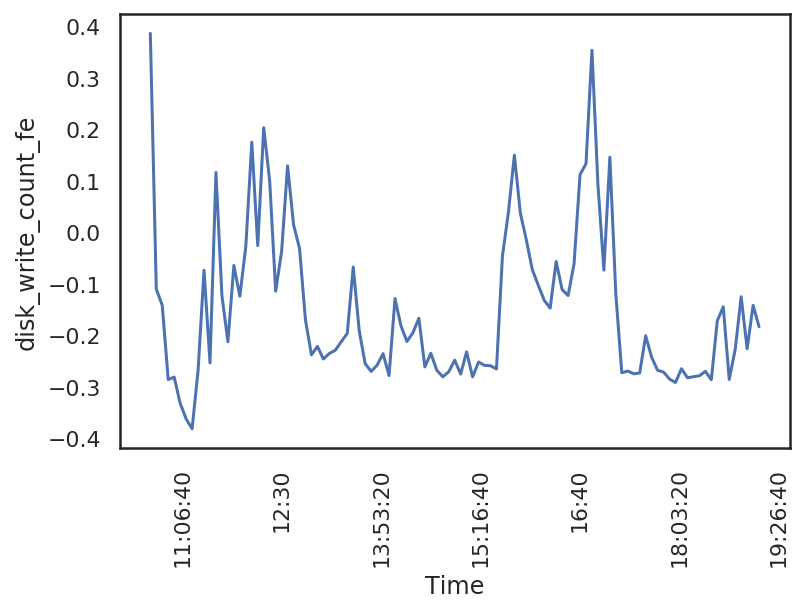

disk_read_bytes_fe


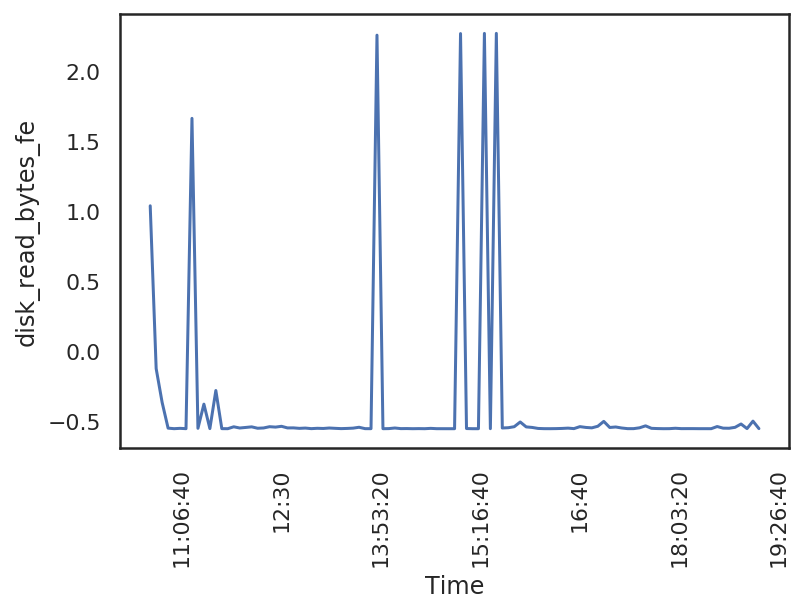

disk_write_bytes_fe


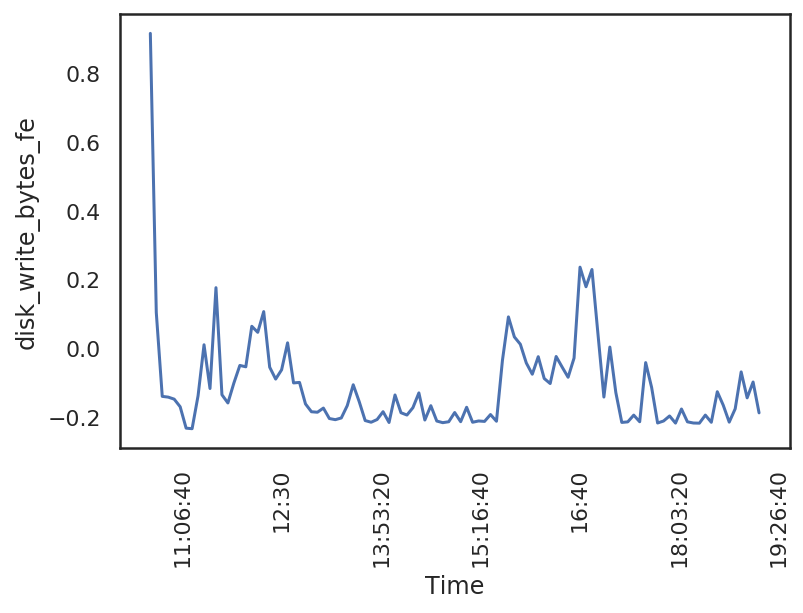

time spent reading from disk_fe


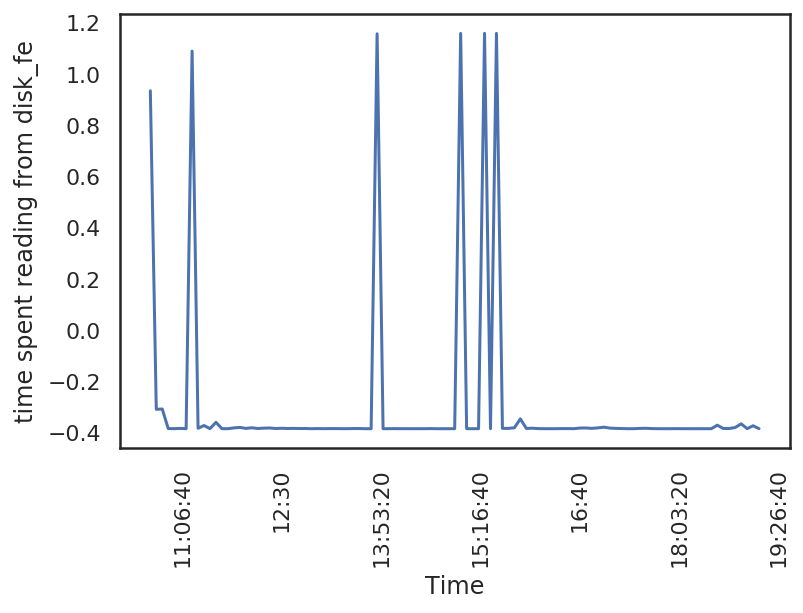

time spent writing to disk_fe


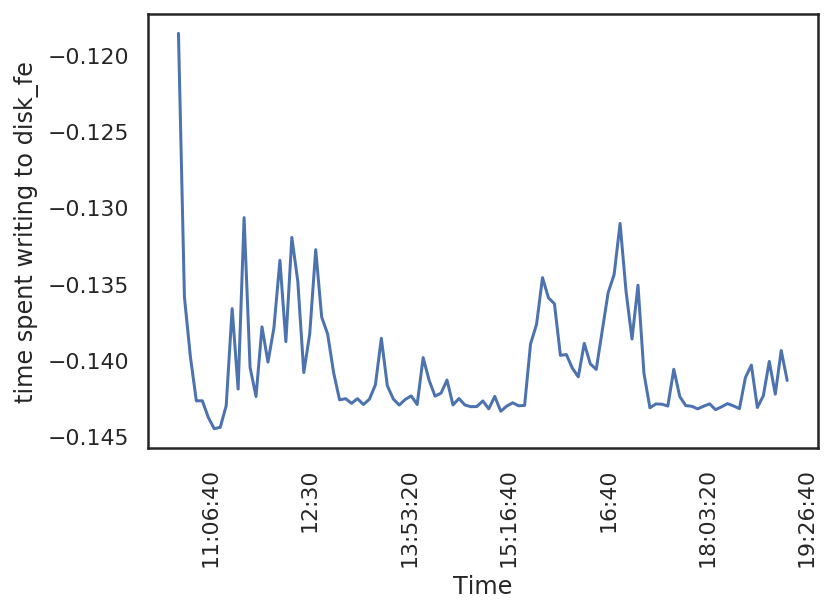

time spent doing actual I/Os_fe


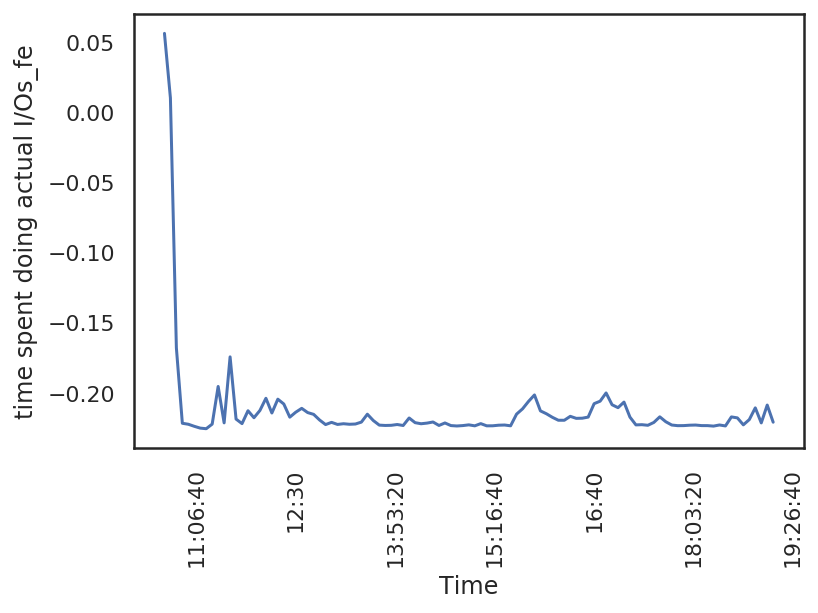

number of bytes sent_fe


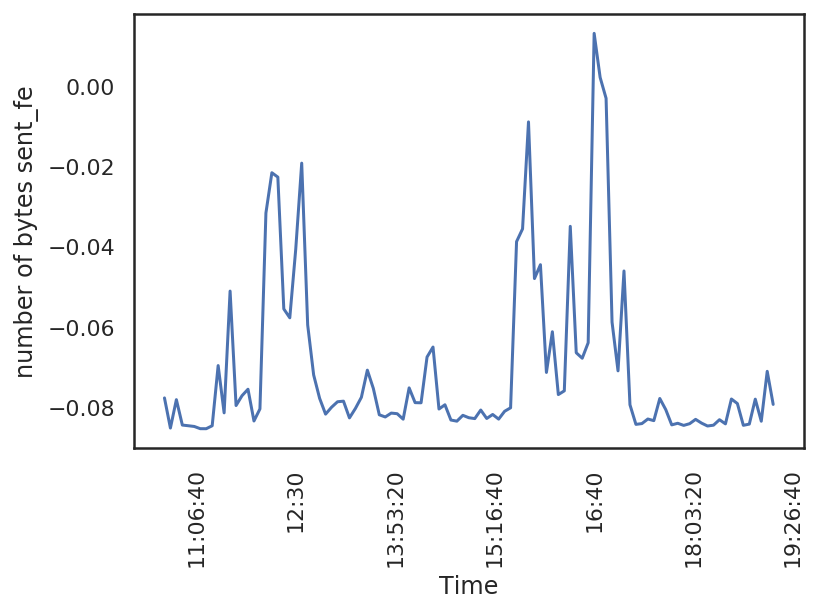

number of bytes received_fe


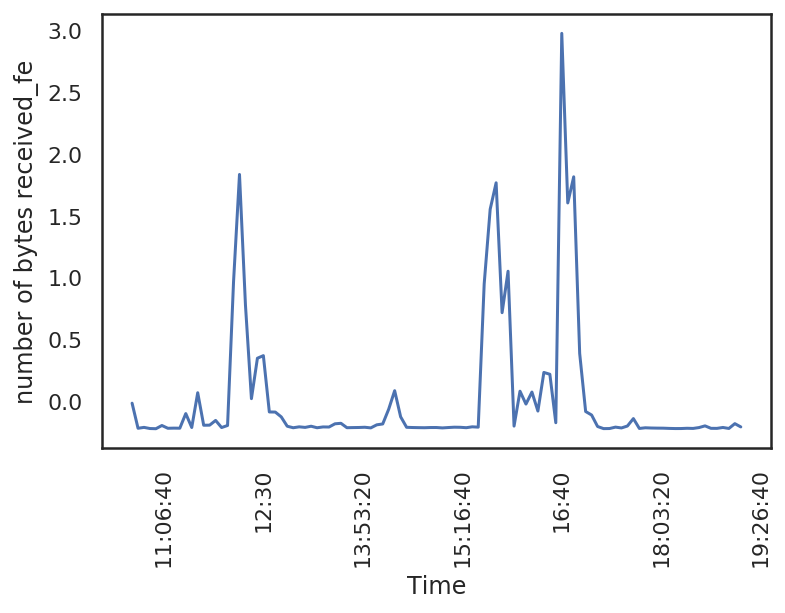

number of packets sent_fe


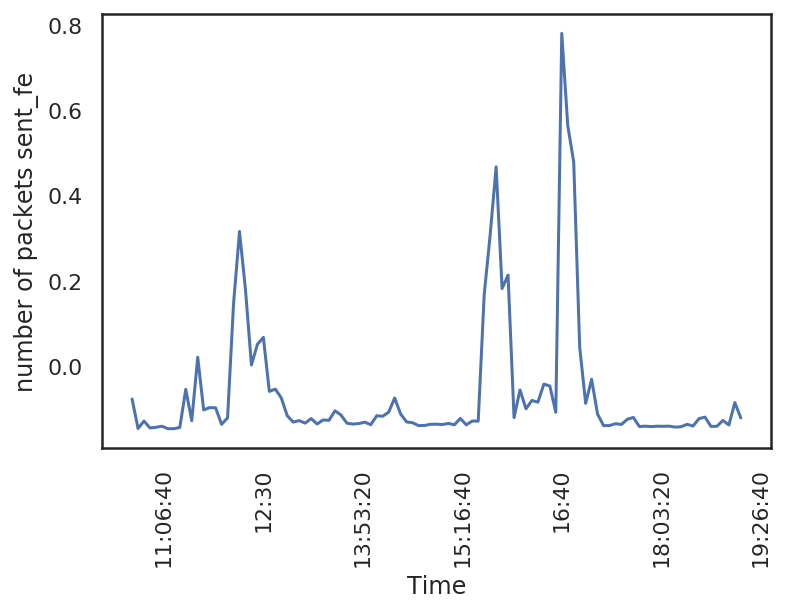

number of packets recived_fe


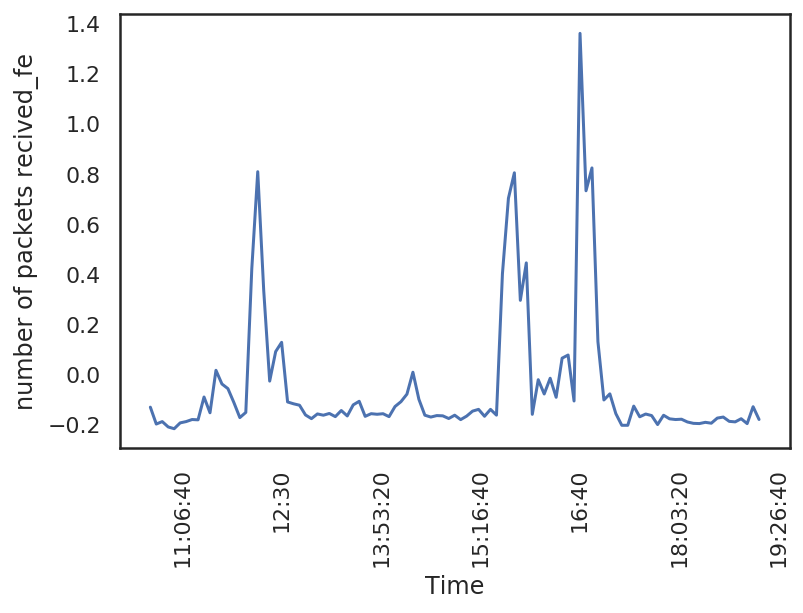

KeyError: 'Dates'

In [27]:
def visualization(data):
    dt = data[data['user_name']=='kiranraikar777@gmail.com']
    dt2 = dt[dt['Dates']==dt['Dates'].unique()[2]]
    
    for i in range(1,len(dt2.columns)):
        if final_df[dt2.columns[i]].dtype != 'object':
            print(dt2.columns[i])
#             plt.figure(figsize=(15,7))
            sb.lineplot(x='Time', y=dt2.columns[i], data=dt2)
            plt.xticks(rotation=90)
            plt.show()
        
visualization(new_data)

In [25]:
for col in final_df.columns:
    if final_df[col].dtypes == 'object':
        final_df.drop(columns=col, inplace=True)

In [28]:
final_data.shape

NameError: name 'final_data' is not defined

In [29]:
final_df.duplicated().sum()

0

In [11]:
# Remove the outlier from the whole dataset
def remove_outlier(df):
    low = .20
    high = .80
    quant_df = df.quantile([low, high])
    for name in list(df.columns):
        if is_numeric_dtype(df[name]):
            df = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]
    return df

# df= remove_outlier(final_df)
# # sb.boxplot(df)
# plt.figure(figsize=(15,7))
# # plt.xticks(rotation='vertical')
# s = df.boxplot()
# s.set_xticklabels(df.columns,rotation=90)

In [ ]:
df.isna().sum()

In [31]:
from sklearn.preprocessing import StandardScaler 
def std(data):
    # standardize the data attributes
    for col in data.columns:
        if data[col].dtype == 'object':
            data = data.drop(columns=col)
    sc = StandardScaler()
    standardized_X = sc.fit_transform(data)
    new_data = pd.DataFrame(standardized_X, columns=data.columns)
    
    return new_data
new_data = std(df)

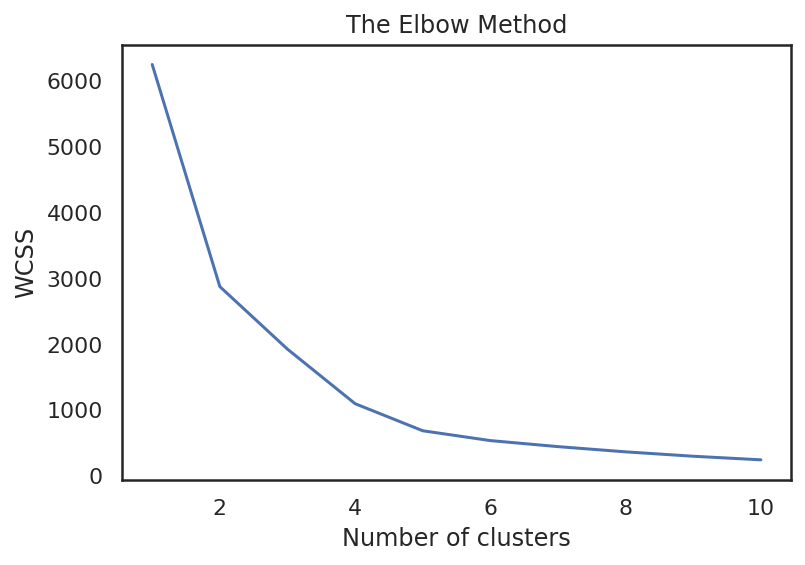

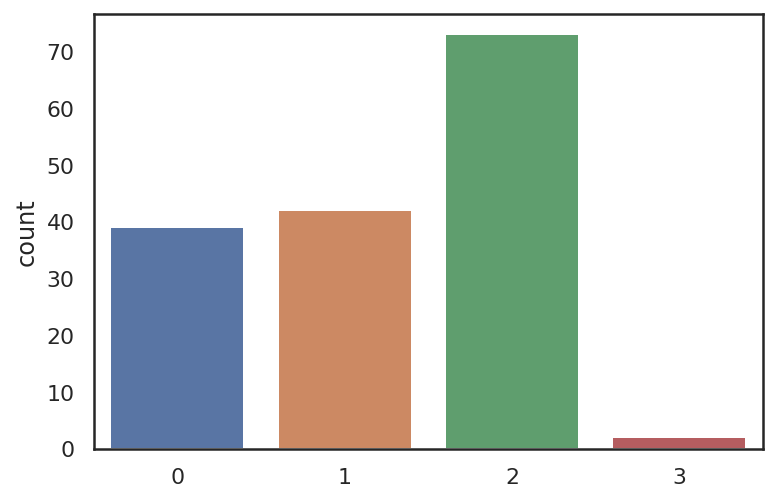

In [32]:
from sklearn.cluster import KMeans
wcss = []

X = np.array(new_data)

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X.reshape(-1,1))
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(new_data)
new_data['y'] = y_kmeans

sb.countplot(x=y_kmeans, data=new_data)


In [ ]:
# # sb.boxplot(final_df)
# from pandas.api.types import is_numeric_dtype
# def remove_outlier(df, name):
#     low = .25
#     high = .75
#     quant_df = df.quantile([low, high])
# #     for name in list(df.columns):
# #         if is_numeric_dtype(df[name]):
#     for i in range(len(df)):
#         if df[name].iloc[i]  > quant_df.loc[low, name] or df[name].iloc[i] < quant_df.loc[high, name]:
# #             print(df[name].iloc[i])
#             df[name].iloc[i] = np.average(df[name])
# #             print(df[name].iloc[i])
#     return df
# l = ['system_active_memory','disk_used_memory','system_inactive_memory','system_buffers_memory',
#        'system_cached_memory','system_shared_memory']
# # for i in l:
# #     print(i)
# df= remove_outlier(new_data,'system_active_memory')
# #     sb.boxplot(df)
# plt.figure(figsize=(15,7))
# plt.xticks(rotation='vertical')
# s = df.boxplot()
# s.set_xticklabels(df.columns,rotation=90)

In [ ]:
# low = .20
# high = .80
# name = 'system_active_memory'
# quant_df = df.quantile([low, high])
# print(quant_df.loc[low, name], quant_df.loc[high, name])
# np.average(new_data[name])

In [ ]:
# # Remove the outlier from the whole dataset
# def remove_outlier(df):
#     low = .25
#     high = .75
#     quant_df = df.quantile([low, high])
#     for name in list(df.columns):
#         if is_numeric_dtype(df[name]):
#             df[name] = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]
#     return df

# df= remove_outlier(new_data)
# plt.figure(figsize=(15,7))
# plt.xticks(rotation='vertical')
# s = df.boxplot()
# s.set_xticklabels(df.columns,rotation=90)

In [ ]:
# df['system_active_memory'], final_df['system_active_memory']
# for col in new_data.columns:
#     if new_data[col].isna():
#         new_data.drop(columns=col, inplace=True)

In [ ]:
# np.average(new_data['Cpu Working Time_fe'])

In [ ]:
# from sklearn.cluster import KMeans
# wcss = []

# X = np.array(new_data)

# for i in range(1, 11):
#     kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
#     kmeans.fit(X.reshape(-1,1))
#     wcss.append(kmeans.inertia_)
# plt.plot(range(1, 11), wcss)
# plt.title('The Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()

# kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
# y_kmeans = kmeans.fit_predict(new_data)
# new_data['y'] = y_kmeans

# sb.countplot(x=y_kmeans, data=new_data)


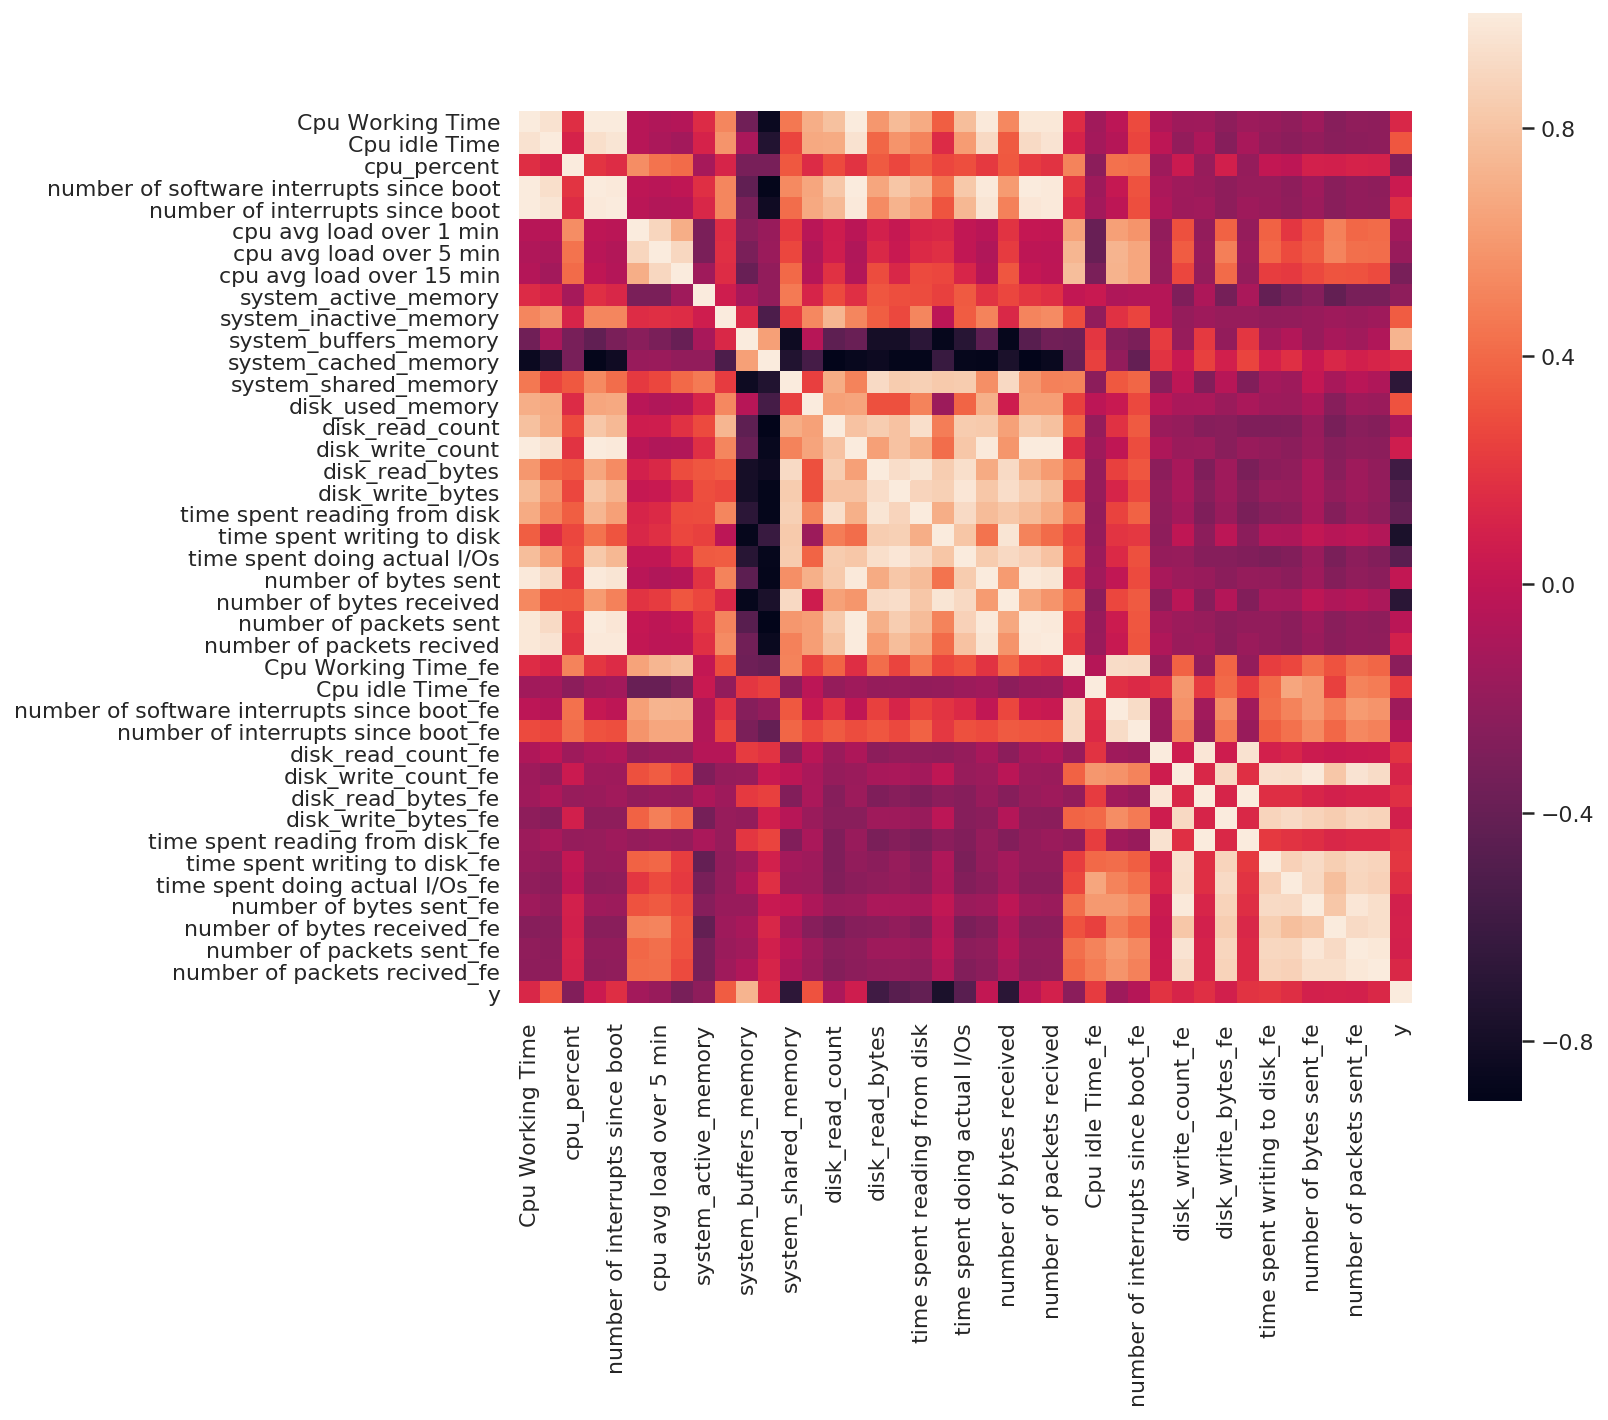

In [33]:
plt.figure(figsize=(10,10))
cor = new_data.corr() #Calculate the correlation of the above variables
sb.heatmap(cor, square = True) #Plot the correlation as heat map

In [ ]:
new_data[['cpu_percent','y']].head(10)

In [ ]:
# df_cluster = final_df
# df_cluster.shape, final_df.shape
# d = final_df

In [ ]:
# kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
# y_kmeans = kmeans.fit_predict(final_df)
# final_df['y'] = y_kmeans

# sb.countplot(x=y_kmeans, data=final_df)

In [ ]:
# plt.figure(figsize=(10,10))
# sb.heatmap(final_df.corr())

In [ ]:
# plt.figure(figsize=(15,8))
# sb.boxplot(data=final_df)
# plt.xticks(rotation=90)

In [ ]:
#import important libraries.
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from pandas.api.types import is_numeric_dtype
# import seaborn as sns
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score
# def remove_outlier(df):
#     low = .25
#     high = .75
#     quant_df = df.quantile([low, high])
#     for name in list(df.columns):
#         if is_numeric_dtype(df[name]):
#             df = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]
#     return df

# df= remove_outlier(final_df)
# sns.boxplot(df)

In [ ]:
# for col in final_df.columns:
# #     plt.hist(x=col)
#     sb.distplot(final_df[col])
#     plt.xticks(rotation=90)
#     plt.show()

In [ ]:
# from sklearn.preprocessing import StandardScaler

# # No Feature Scaling as library does it
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X = sc_X.fit_transform(final_df)



In [ ]:
# from sklearn.cluster import KMeans
# wcss = []
# X = np.array(final_df)

# for i in range(1, 11):
#     kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
#     kmeans.fit(X)
#     wcss.append(kmeans.inertia_)
# plt.plot(range(1, 11), wcss)
# plt.title('The Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()

# kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
# y_kmeans = kmeans.fit_predict(final_df)
# final_df['y'] = y_kmeans

# sb.countplot(x=y_kmeans, data=final_df)
